In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sc
import math
from ann import model

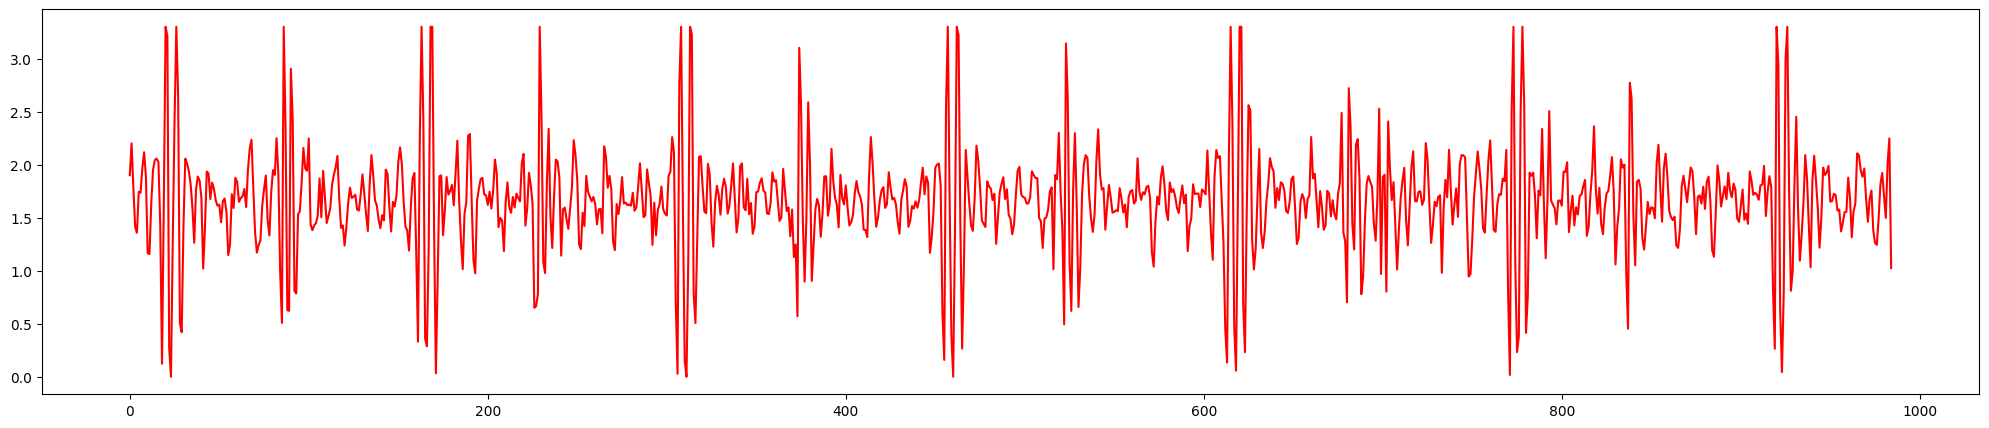

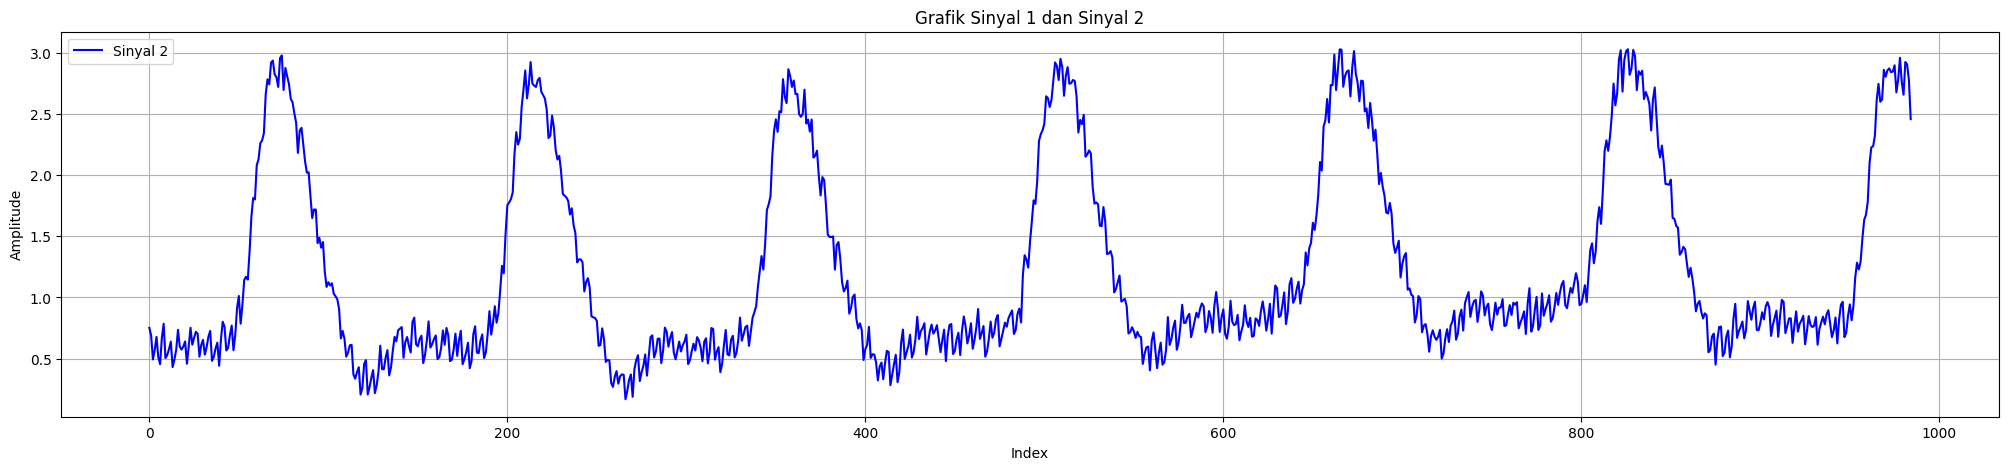

In [1204]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\Users\HP\subjek\fix\subj1.txt'

def read_and_clean_file(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            if len(line.split()) == 2:  
                data.append(line.strip().split())
    
    df = pd.DataFrame(data, columns=['Sinyal1', 'Sinyal2'])
    
    df['Sinyal1'] = df['Sinyal1'].astype(float)
    df['Sinyal2'] = df['Sinyal2'].astype(float)
    
    return df

df = read_and_clean_file(file_path)

# plot data
plt.figure(figsize=(25, 5))
plt.plot(df['Sinyal1'], label='Sinyal 1', color='red')
plt.figure(figsize=(25, 5))
plt.plot(df['Sinyal2'], label='Sinyal 2', color='blue')

plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.title('Grafik Sinyal 1 dan Sinyal 2')
plt.legend()
plt.grid(True)
plt.show()


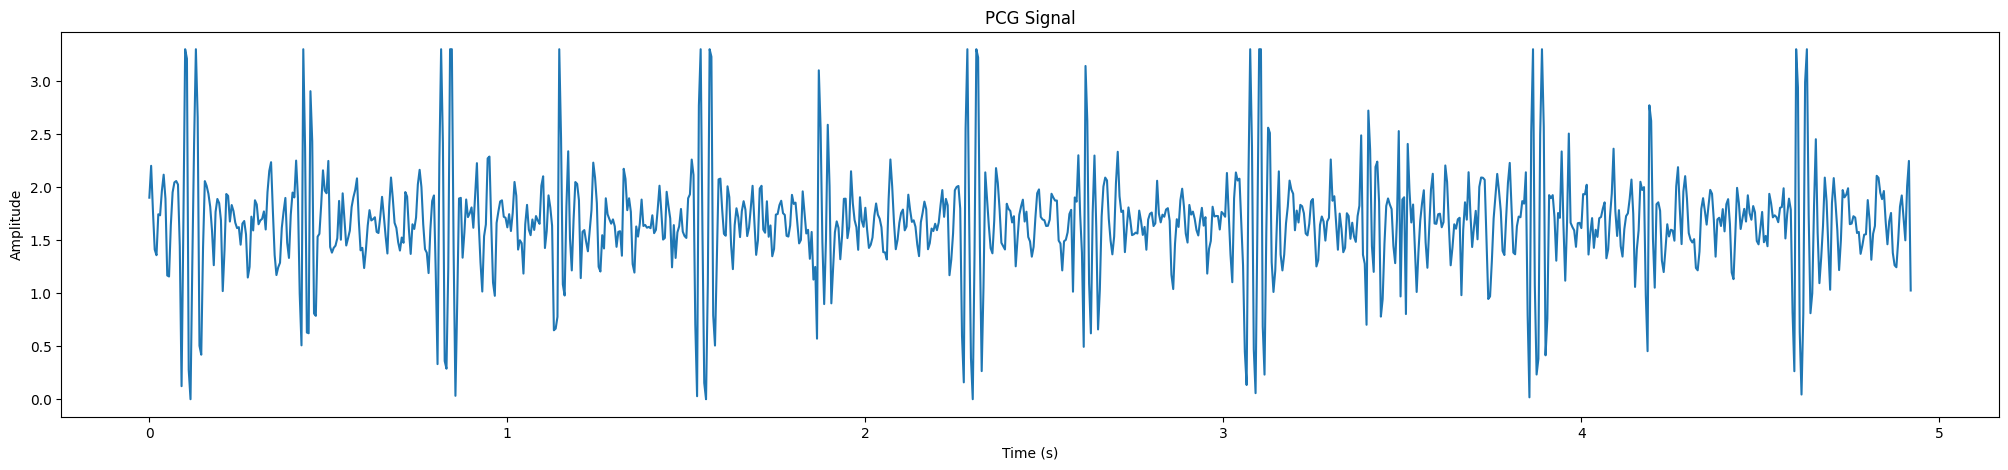

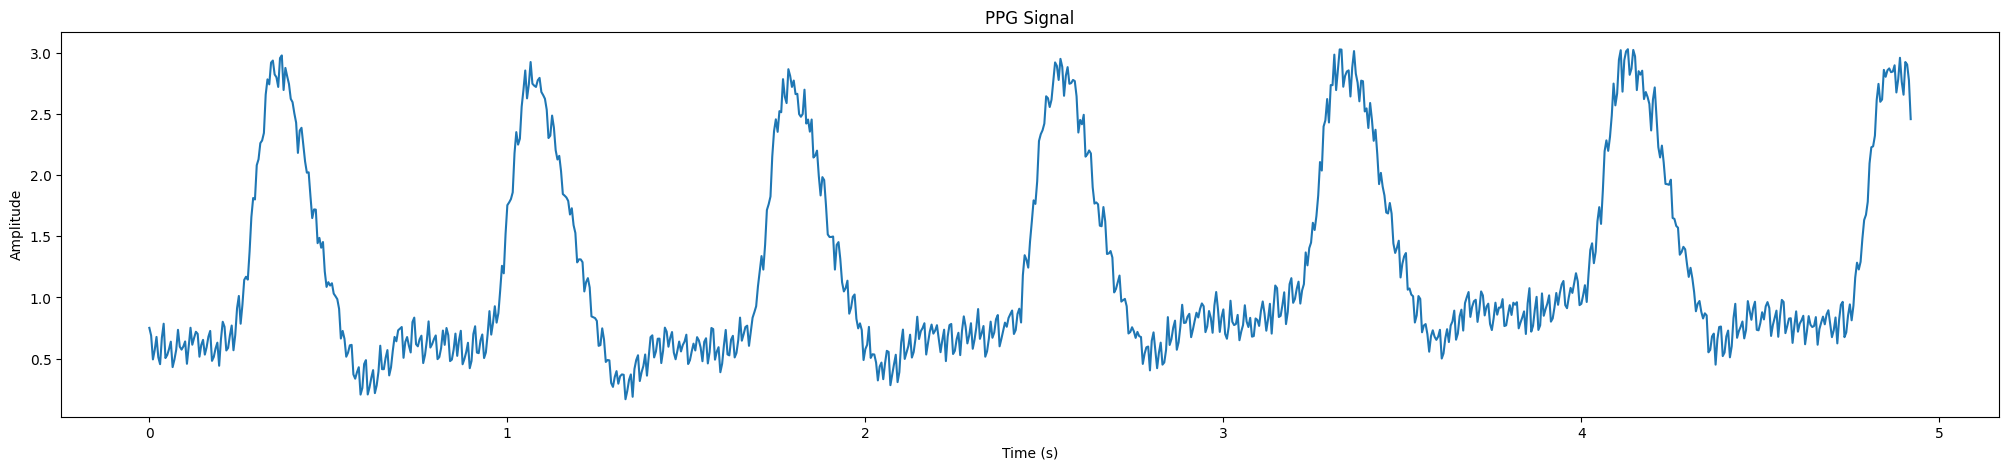

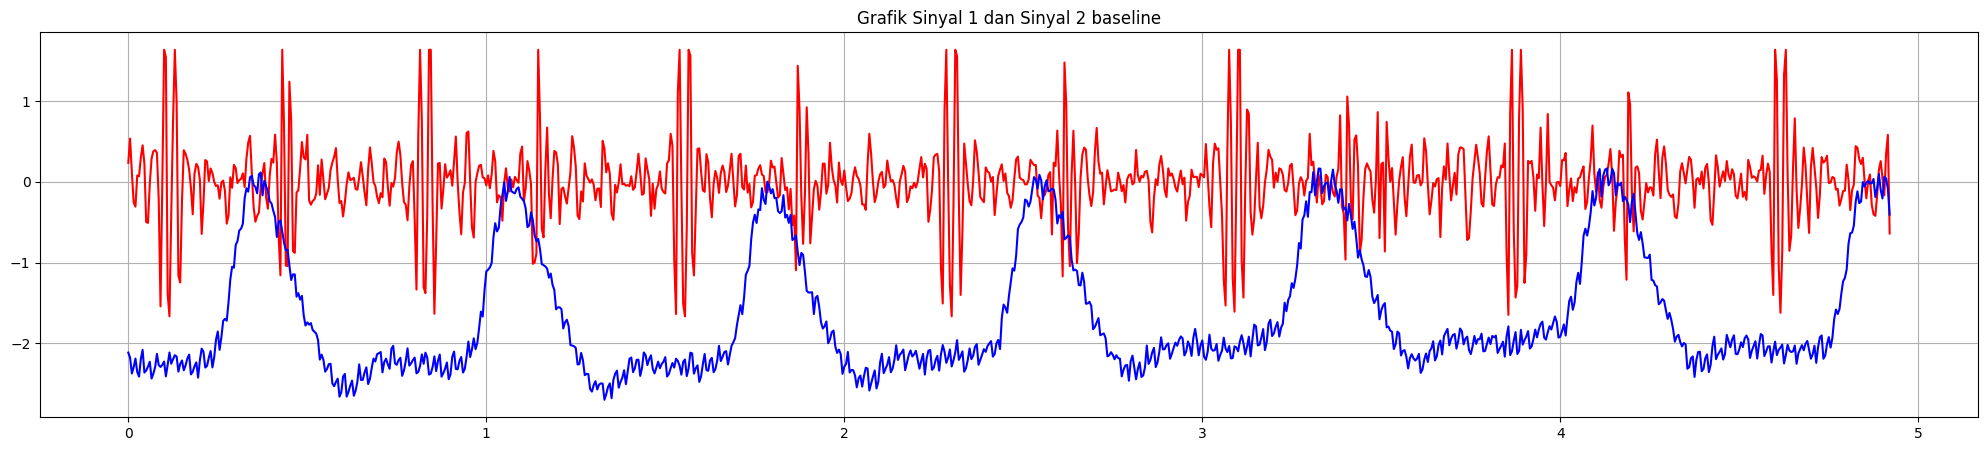

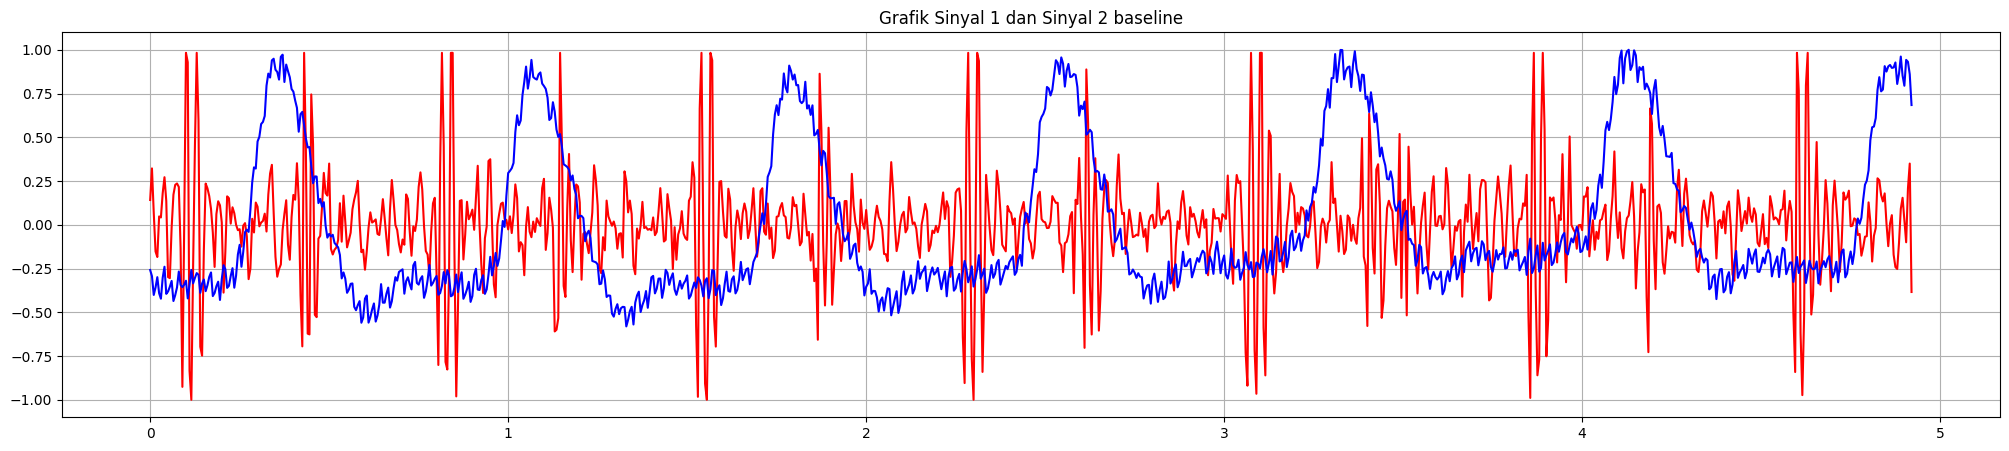

In [1206]:
import numpy as np

pcg=df['Sinyal1']
ppg=df['Sinyal2']

signal_arr1 = np.array(pcg)
original_length = len(signal_arr1)
time_bf1 = np.arange(original_length) / 200

plt.figure(figsize=(25, 5))
plt.plot(time_bf1, signal_arr1, label='PCG')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('PCG Signal')

signal_arr2 = np.array(ppg)
original_length = len(signal_arr2)
time_bf2 = np.arange(original_length) / 200

plt.figure(figsize=(25, 5))
plt.plot(time_bf2, signal_arr2, label='PPG')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('PPG Signal')

tengah = signal_arr2 - np.mean(max(signal_arr2)-min(signal_arr2))
signalpcg_baseline = signal_arr1 - np.mean(signal_arr1) 
signalppg_baseline = signal_arr2 - np.mean(signal_arr2)

plt.figure(figsize=(25, 5))
plt.plot(time_bf1,signalpcg_baseline, label='Sinyal 1', color='red')
plt.title('Grafik Sinyal 1 dan Sinyal 2 baseline')
plt.plot(time_bf2,tengah, label='Sinyal 2', color='blue')

plt.grid(True)

signalpcg_normalized = signalpcg_baseline / np.max(np.abs(signalpcg_baseline))
signalppg_normalized = signalppg_baseline / np.max(np.abs(signalppg_baseline))

plt.figure(figsize=(25, 5))
plt.plot(time_bf1,signalpcg_normalized, label='Sinyal 1', color='red')
plt.title('Grafik Sinyal 1 dan Sinyal 2 baseline')
plt.plot(time_bf2,signalppg_normalized, label='Sinyal 2', color='blue')

plt.grid(True)

# Downsampling Signal

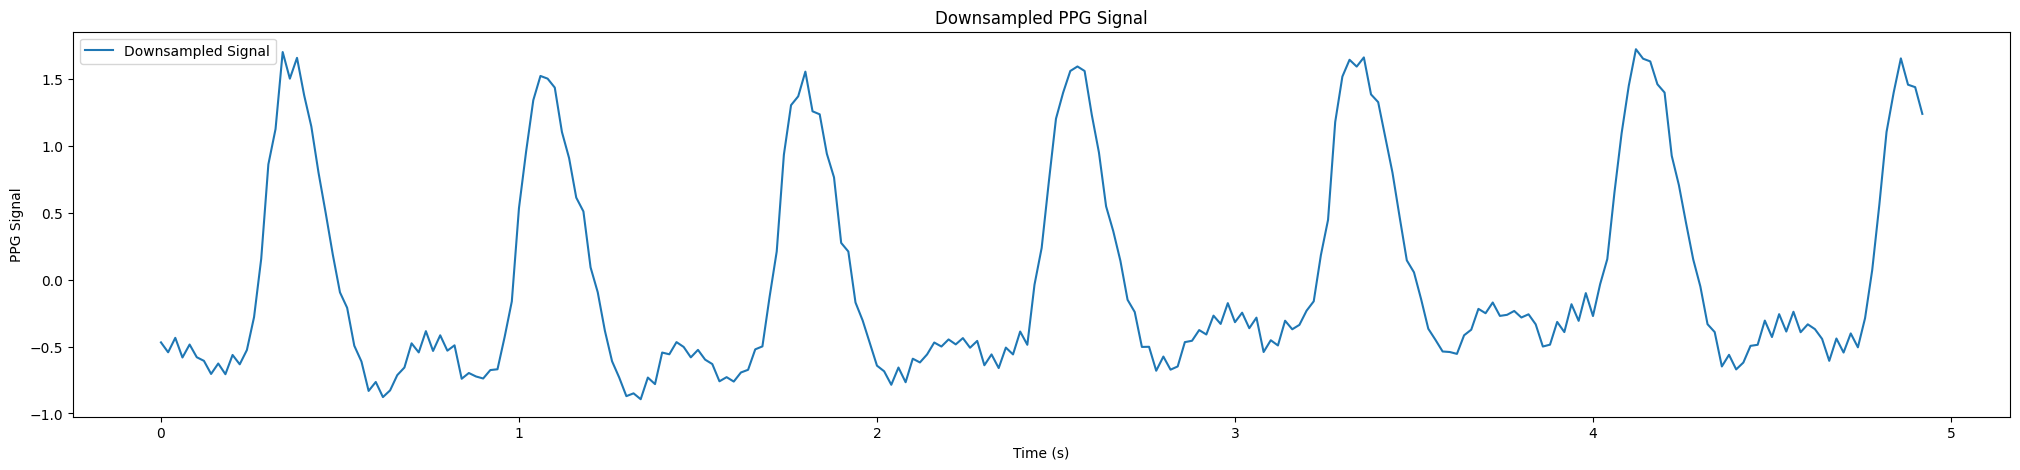

Text(0.5, 1.0, 'Downsampled PCG Signal')

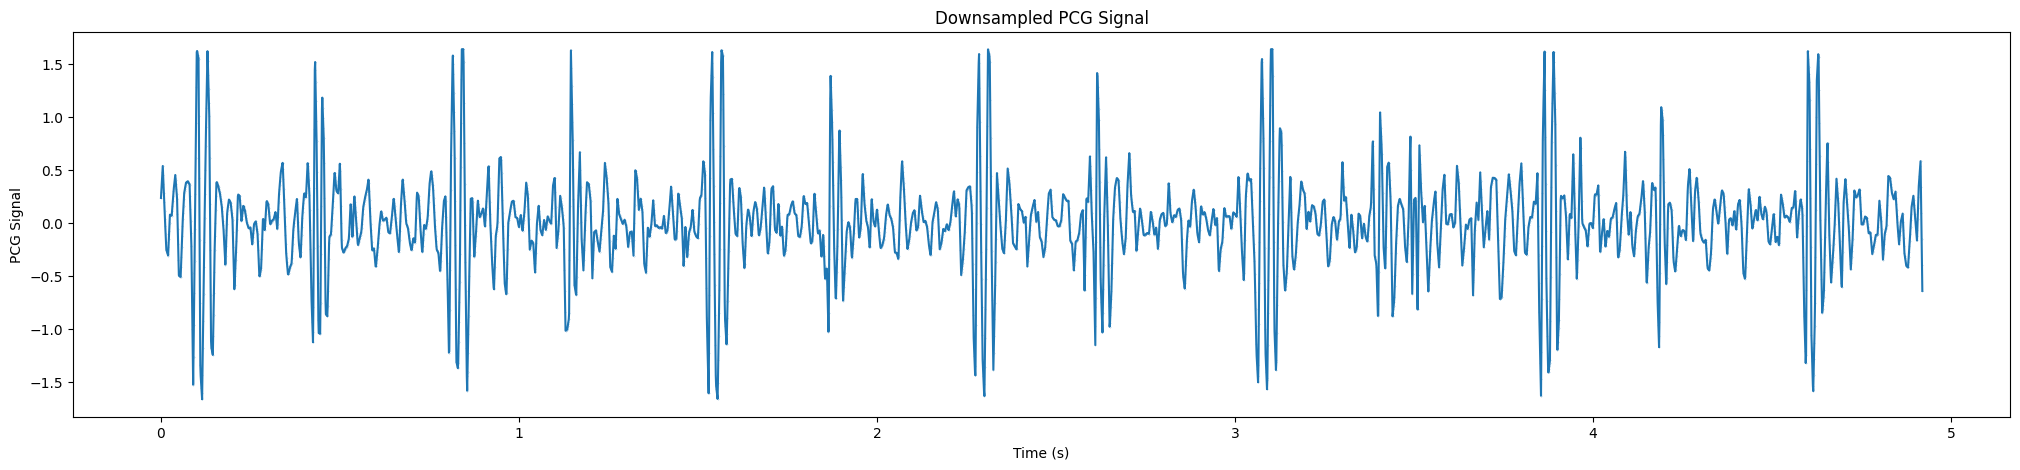

In [1143]:
from scipy.interpolate import interp1d
signal_arr1 = np.array(signalppg_baseline)
original_length = len(signal_arr1)
time_bf1 = np.arange(original_length) / 200
downsample_factor = 4 #500:50=10
downsampled_signal = signal_arr1[::downsample_factor]
downsampled_length = len(downsampled_signal)
time_new1 = np.arange(downsampled_length) / 50 
plt.figure(figsize=(25, 5))
plt.plot(time_new1, downsampled_signal, label='Downsampled Signal')
plt.xlabel('Time (s)')
plt.ylabel('PPG Signal')
plt.title('Downsampled PPG Signal')
plt.legend()
plt.show()

signal_arr2 = np.array(signalpcg_baseline)
original_length = len(signal_arr2)
time_bf2 = np.arange(original_length) / 200
f_interp = interp1d(time_bf2, signal_arr2, kind='linear')

upsample_factor = 5
upsampled_length = len(signal_arr2) * upsample_factor
time_new_upsampled = np.linspace(time_bf1[0], time_bf1[-1], upsampled_length)
upsampled_signal = f_interp(time_new_upsampled)
plt.figure(figsize=(25, 5))
plt.plot(time_new_upsampled, upsampled_signal, label='Upsampled Signal', marker='o', markersize=0.1)
plt.xlabel('Time (s)')
plt.ylabel('PCG Signal')
plt.title('Downsampled PCG Signal')

Text(0.5, 1.0, 'Original PPG and PCG Signal')

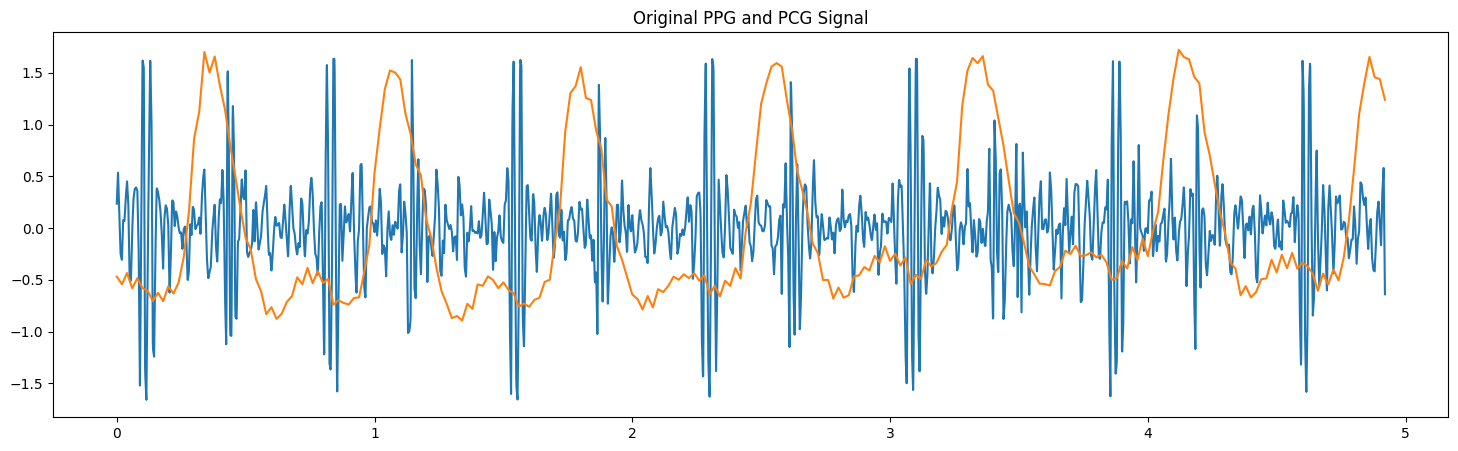

In [1144]:
# Plot original PPG signal
time_ppg=time_new1
ppg2=downsampled_signal
time_pcg=time_new_upsampled
pcg2=upsampled_signal
plt.figure(figsize=(18,5))
plt.plot(time_pcg,pcg2)
plt.plot(time_ppg,ppg2)
plt.title('Original PPG and PCG Signal')


# zerocrossing ppg 


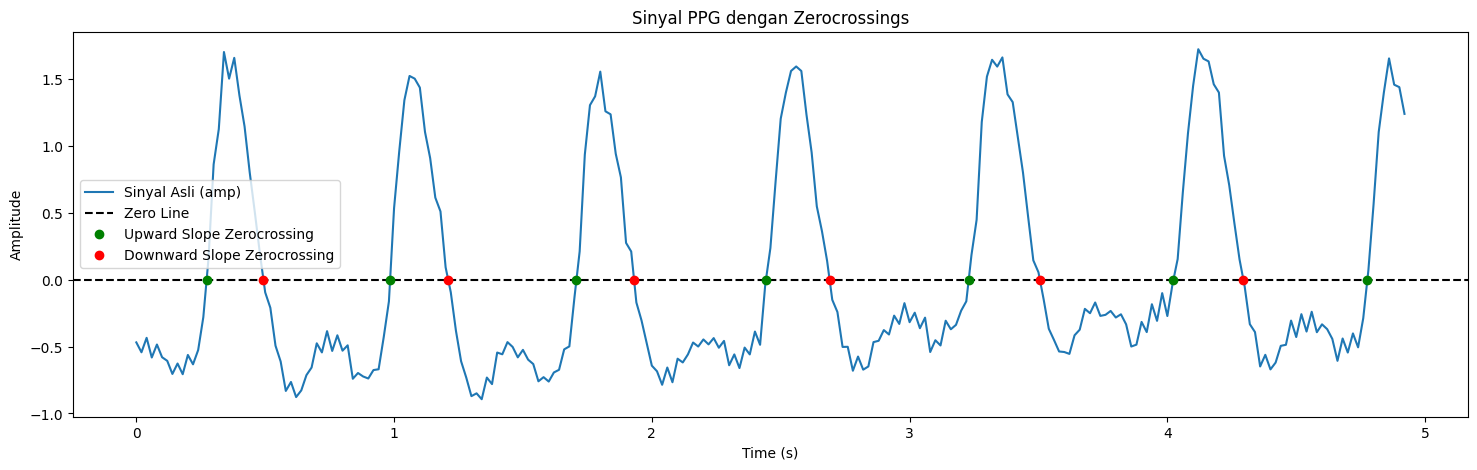

7
247


In [1145]:

fs = 50 
t = np.arange(len(ppg2)) / fs  

zerocrossings = []
for i in range(1, len(ppg2)):
    if (ppg2[i-1] > 0 and ppg2[i] < 0) or (ppg2[i-1] < 0 and ppg2[i] > 0):
        zerocrossings.append(i)

zerocrossing_points = []
usz = []  
dsz = []  
for i in zerocrossings:
    x1, x2 = i-1, i
    y1, y2 = ppg2[x1], ppg2[x2]
    x_zero = x1 - y1 * (x2 - x1) / (y2 - y1)
    zerocrossing_points.append(x_zero / fs)  

    if y1 < 0 and y2 > 0:
        usz.append(x_zero / fs)  
    elif y1 > 0 and y2 < 0:
        dsz.append(x_zero / fs) 

plt.figure(figsize=(18, 5))
plt.plot(time_ppg, ppg2, label='Sinyal Asli (amp)')
plt.axhline(0, color='black', linestyle='--', label='Zero Line')

plt.plot(usz, np.zeros(len(usz)), 'go', label='Upward Slope Zerocrossing')
plt.plot(dsz, np.zeros(len(dsz)), 'ro', label='Downward Slope Zerocrossing')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sinyal PPG dengan Zerocrossings')
plt.legend()
plt.show()

print(len(usz))
print(len(ppg2))


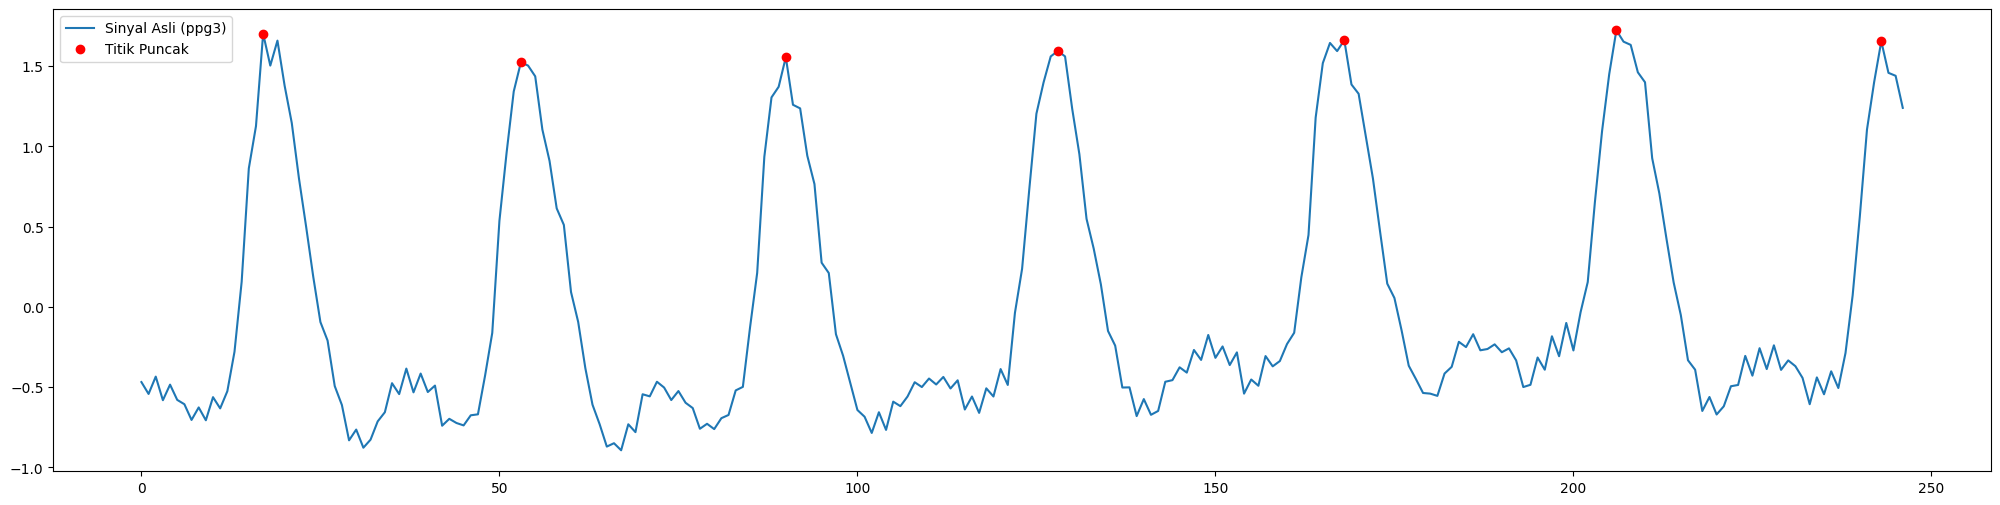

jarak antar peak : [ 2 34 37 38 38  2 38 37]
rata-rata jarak : 18.857142857142858
jarak antar peak baru : [36 37 38 40 38 37]
rata-rata jarak baru : 37.666666666666664
tps2: [17, 53, 90, 128, 168, 206, 243]


In [1146]:

tps2 = []
for k in range(1, len(ppg2) - 1):
    if ppg2[k] > ppg2[k+1] and ppg2[k] > ppg2[k-1] and ppg2[k] > 0:
        tps2.append(k)

def filter_peaks(tps2, ppg3, rata2A):
    filtered_tp = []
    i = 0
    while i < len(tps2):
        if i == len(tps2) - 1:
            filtered_tp.append(tps2[i])
            break
        if tps2[i + 1] - tps2[i] < rata2A:
            if ppg3[tps2[i + 1]] > ppg3[tps2[i]]:
                filtered_tp.append(tps2[i + 1])
            else:
                filtered_tp.append(tps2[i])
            i += 2
        else:
            filtered_tp.append(tps2[i])
            i += 1
    return filtered_tp

while True:
    dispeakA = np.diff(tps2)
    filtered_tp = filter_peaks(tps2, ppg2, 28)
    dispeakAnew = np.diff(filtered_tp)
    if np.all(dispeakAnew >= 28):
        break
    tps2 = filtered_tp

plt.figure(figsize=(25, 6))
plt.plot(ppg2, label='Sinyal Asli (ppg3)')

filtered_tp_final2=[]
tps2_values=[]
for k in filtered_tp:
    filtered_tp_final2.append(k)
    tps2_values.append(ppg2[k])

plt.plot(filtered_tp_final2, tps2_values, 'ro', label='Titik Puncak')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Peak Sinyal PPG')
plt.legend()
plt.show()

print("jarak antar peak :", dispeakA)
print("rata-rata jarak :", rata2A)
print("jarak antar peak baru :", dispeakAnew)
print("rata-rata jarak baru :", np.mean(dispeakAnew))
print("tps2:", filtered_tp)


Text(0.5, 1.0, 'Peak Sinyal PPG')

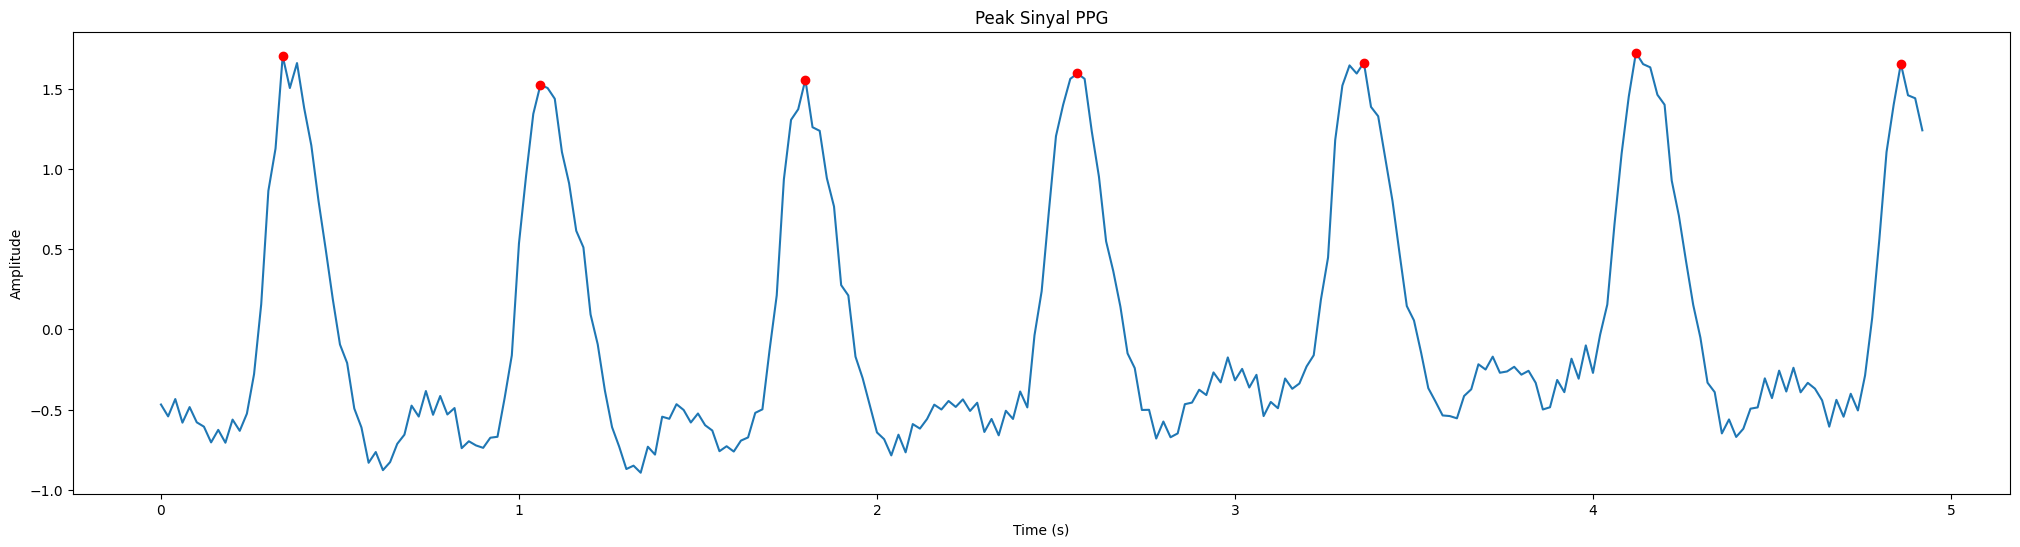

In [1202]:
plt.figure(figsize=(25, 6))
plt.plot(time_ppg, ppg2, label='PPG S2')
plt.plot(np.array(filtered_tp_final2)/fs,tps2_values, 'ro', label='Titik Puncak')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Peak Sinyal PPG')

# DWT

In [1148]:
#Daubechies Wavelet
fs2 = 1000

#lpf
h = [0]*4
h[0] = (1 + math.sqrt(3)) / (4 * math.sqrt(2))
h[1] = (3 + math.sqrt(3)) / (4 * math.sqrt(2))
h[2] = (3 - math.sqrt(3)) / (4 * math.sqrt(2))
h[3] = (1 - math.sqrt(3)) / (4 * math.sqrt(2))

#hpf
g = [0]*4

for i in range(4):
    g[i] = math.pow(-1, i) * h[3-i]
    

print("nilai h0 = ", round(h[0], 2))
print("nilai h1 = ", round(h[1], 2))
print("nilai h2 = ", round(h[2], 2))
print("nilai h3 = ", round(h[3], 2))
print("---")

print("nilai g0 = ", round(g[0], 2))
print("nilai g1 = ", round(g[1], 2))
print("nilai g2 = ", round(g[2], 2))
print("nilai g3 = ", round(g[3], 2))

nilai h0 =  0.48
nilai h1 =  0.84
nilai h2 =  0.22
nilai h3 =  -0.13
---
nilai g0 =  -0.13
nilai g1 =  -0.22
nilai g2 =  0.84
nilai g3 =  -0.48


In [1149]:
ndat = len(pcg2)
ndat

4925

In [1150]:
def dekomposisi(div, sinyal):
    a = [0.0] * (ndat // div)
    d = [0.0] * (ndat // div)
    
    for i in range(1, ndat//div):
        a[i] = 0.0
        d[i] = 0.0
        for j in range(4):
            if 2*i+j < len(sinyal):
                a[i] += h[j] * sinyal[2*i+j]
                d[i] += g[j] * sinyal[2*i+j]
                
    return a, d

In [1151]:
def plotA(level, div, a):
    plt.figure(figsize=(18, 5))
    plt.subplot(211)
    plt.plot(time_pcg[:ndat//div-1], a[1:])
    plt.title(f'Approximation Coefficients Level {level}')
    plt.show()

In [1152]:
def plotD(level, div, d):
    plt.figure(figsize=(18, 5))
    plt.subplot(211)
    plt.plot(time_pcg[:ndat//div-1], d[1:])
    plt.title(f'Detail Coefficients Level {level}')
    plt.xlabel('Time (s)')
    plt.show()

In [1153]:
#dekomposisi 1
a1, d1 = dekomposisi(2, pcg2)
#dekomposisi 2
a2, d2 = dekomposisi(4, a1)
#dekomposisi 3
a3, d3 = dekomposisi(8, a2)
#dekomposisi 4
a4, d4 = dekomposisi(16, a3)
#dekomposisi 5
a5, d5 = dekomposisi(32, a4)
#dekomposisi 6
a6, d6 = dekomposisi(64, a5)

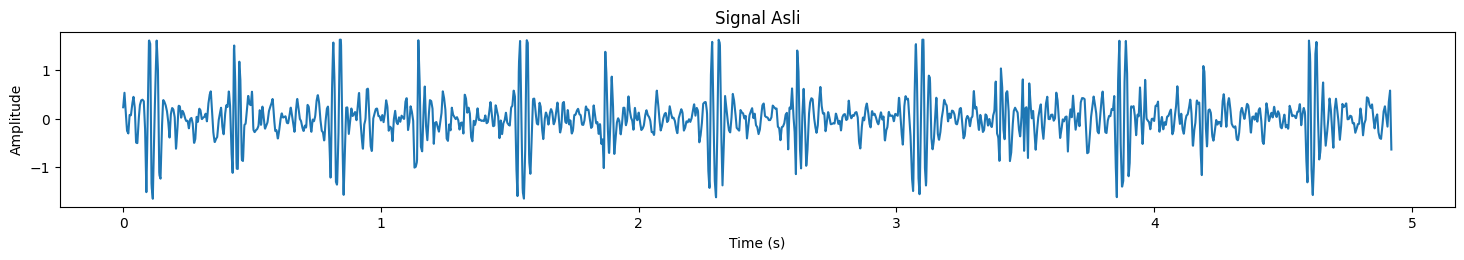

Koefisien Aproksimasi


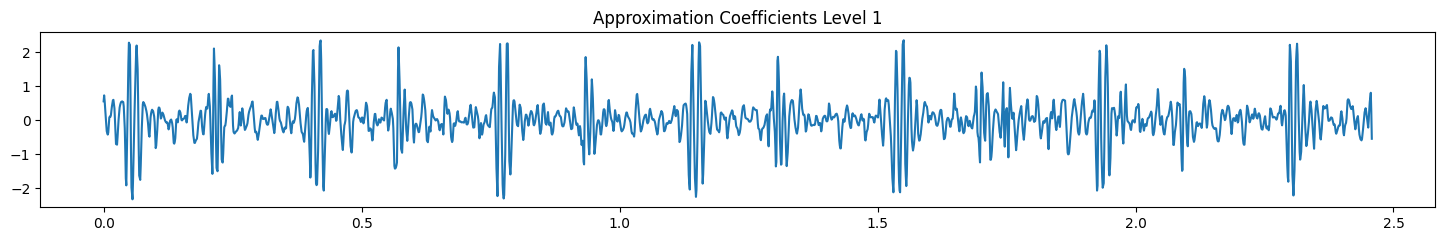

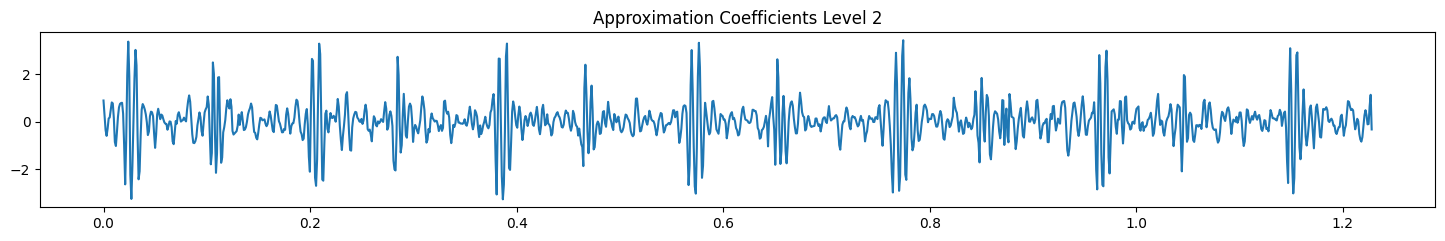

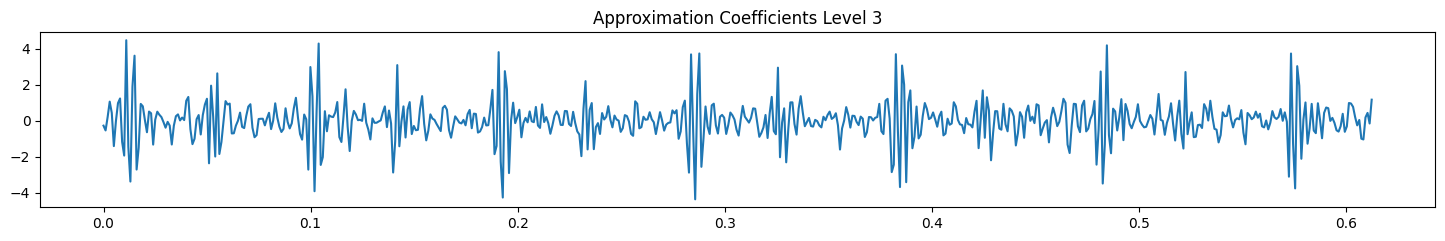

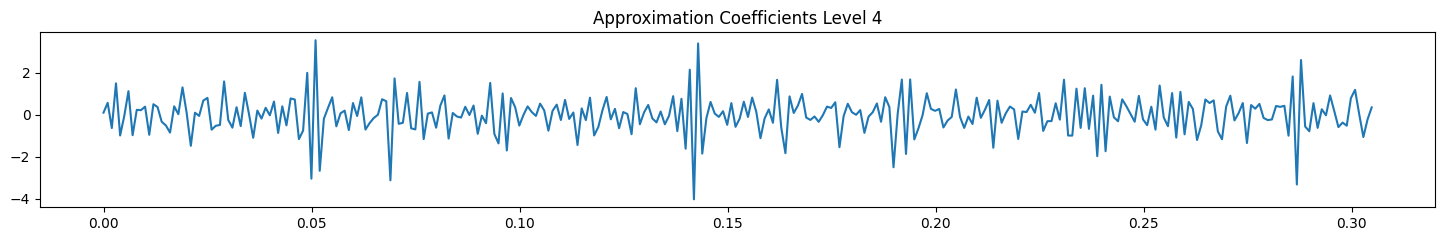

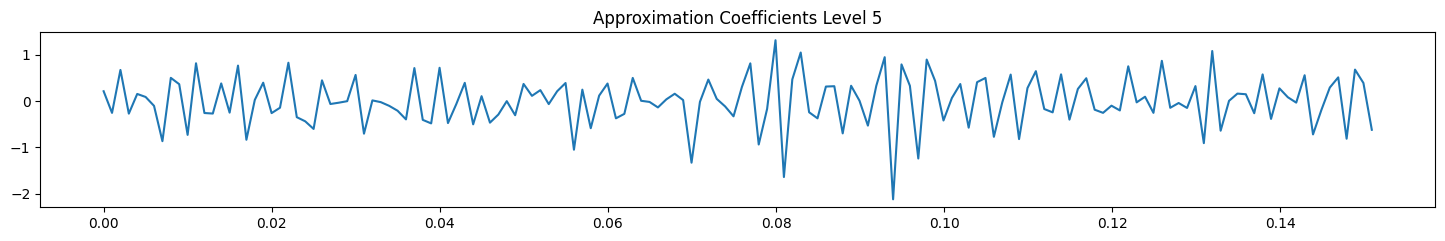

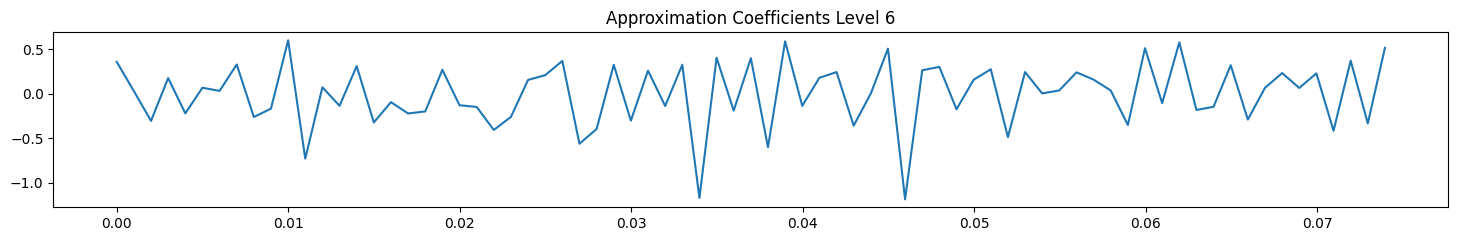

In [1154]:

# Plot the signal
plt.figure(figsize=(18, 5))
plt.subplot(211)
plt.plot(time_pcg, pcg2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal Asli')
plt.show()

print("Koefisien Aproksimasi")
plotA(1, 2, a1)
plotA(2, 4, a2)
plotA(3, 8, a3)
plotA(4, 16, a4)
plotA(5, 32, a5)
plotA(6, 64, a6)

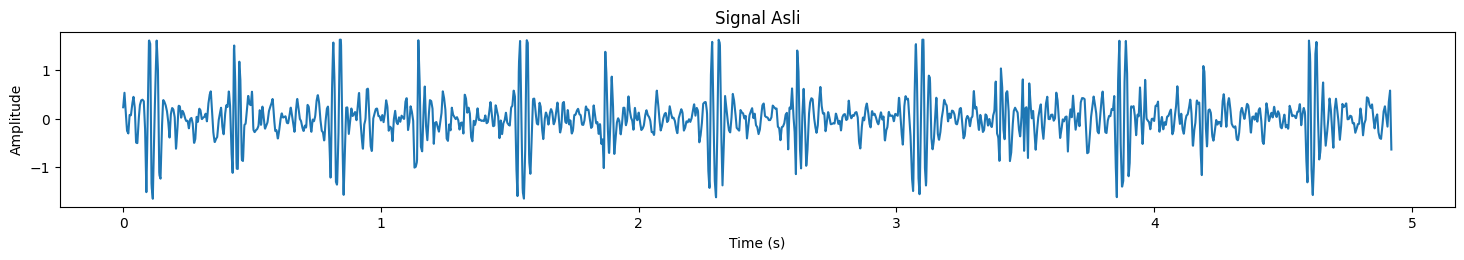

Koefisien Detail


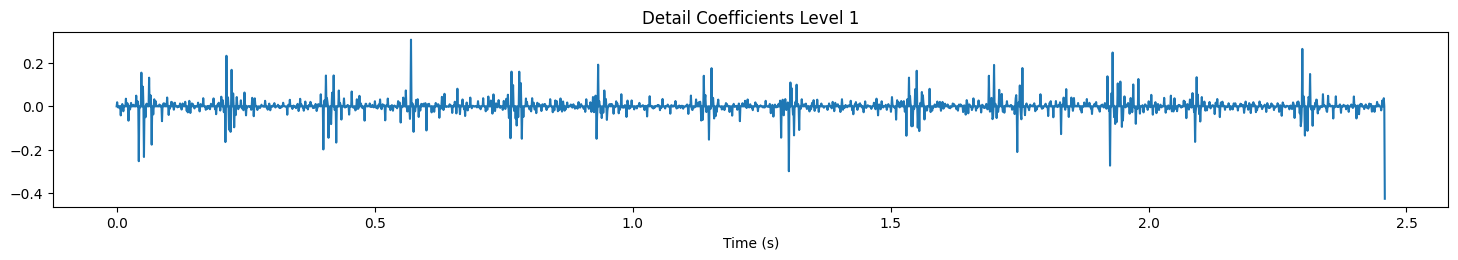

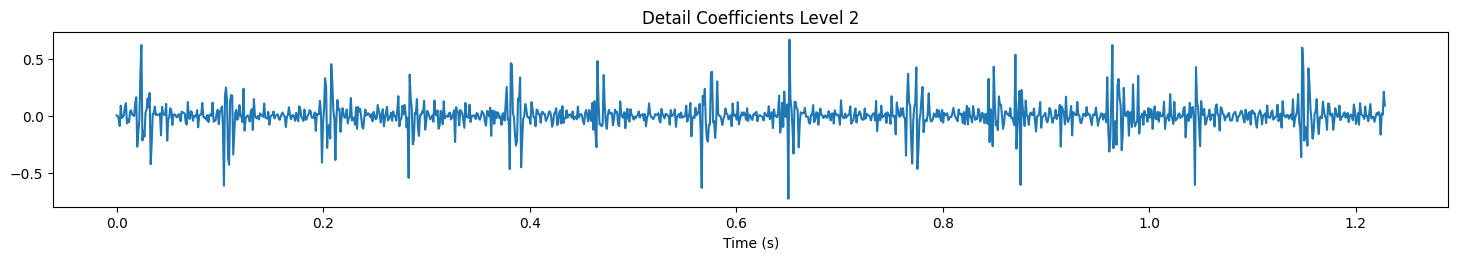

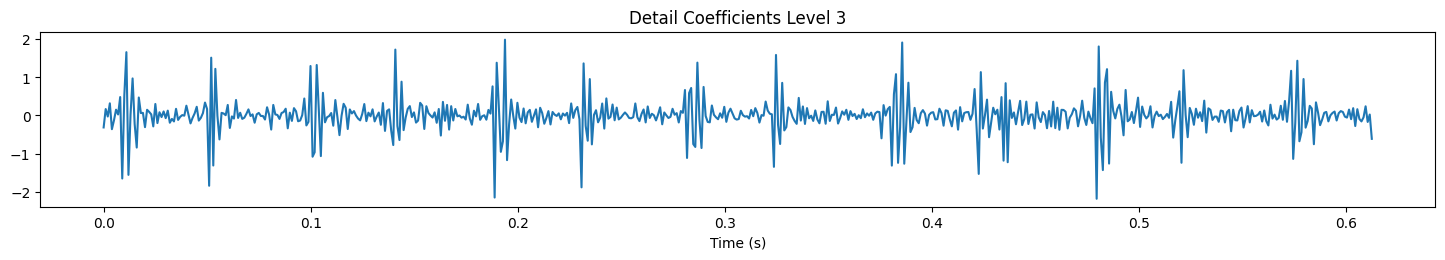

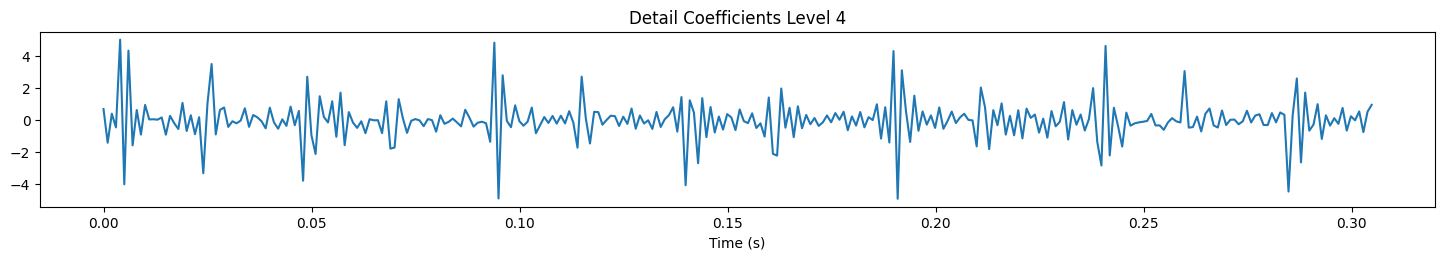

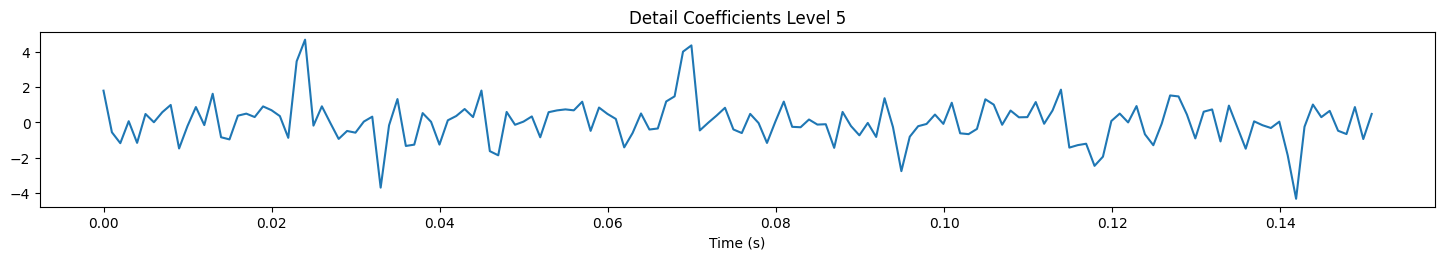

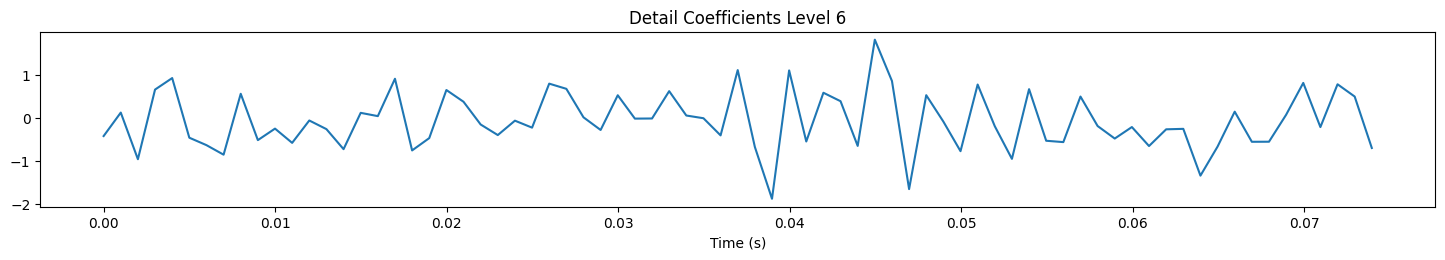

In [1155]:
# Plot the signal
plt.figure(figsize=(18, 5))
plt.subplot(211)
plt.plot(time_pcg, pcg2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal Asli')
plt.show()

print("Koefisien Detail")
plotD(1, 2, d1)
plotD(2, 4, d2)
plotD(3, 8, d3)
plotD(4, 16, d4)
plotD(5, 32, d5)
plotD(6, 64, d6)

In [1156]:

#coef reconstruction
ih = [0]*4
ih[0] = (1 - math.sqrt(3)) / (4 * math.sqrt(2))
ih[1] = (3 - math.sqrt(3)) / (4 * math.sqrt(2))
ih[2] = (3 + math.sqrt(3)) / (4 * math.sqrt(2))
ih[3] = (1 + math.sqrt(3)) / (4 * math.sqrt(2))

ig = [0]*4

for i in range(4):
    ig[i] = math.pow(-1, i) * ih[3-i]

In [1157]:
def rekonstruksi(a, d):
    sinyal = [0.0] * len(a) * 2
    
    for i in range(len(a)):
        for j in range(4):
            if 2*i+j < len(sinyal):
                sinyal[2*i+j] += ih[j] * a[i] + ig[j] * d[i]
                
    return sinyal

In [1158]:
def plotRekon(sinyal, level):
    time_rekon = np.arange(len(sinyal)) / fs2
    plt.figure(figsize=(18, 5))
    plt.subplot(211)
    plt.plot(time_rekon, sinyal)
    plt.title(f'Sinyal Rekonstruksi Level {level}')
    plt.show()

In [1159]:
a1_rekonstruksi = rekonstruksi(a1, d1)
a2_rekonstruksi = rekonstruksi(a2, d2)
a3_rekonstruksi = rekonstruksi(a3, d3)
a4_rekonstruksi = rekonstruksi(a4, d4)
a5_rekonstruksi = rekonstruksi(a5, d5)
a6_rekonstruksi = rekonstruksi(a6, d6)

In [1160]:
len(a5_rekonstruksi)
len(a4_rekonstruksi)

614

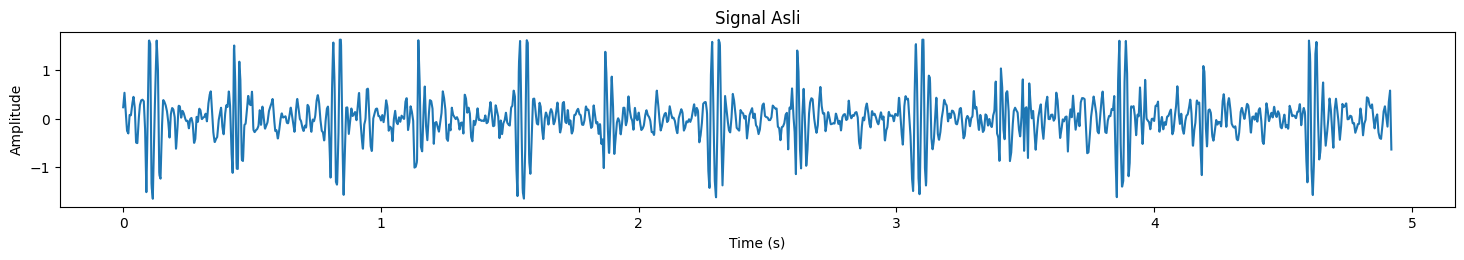

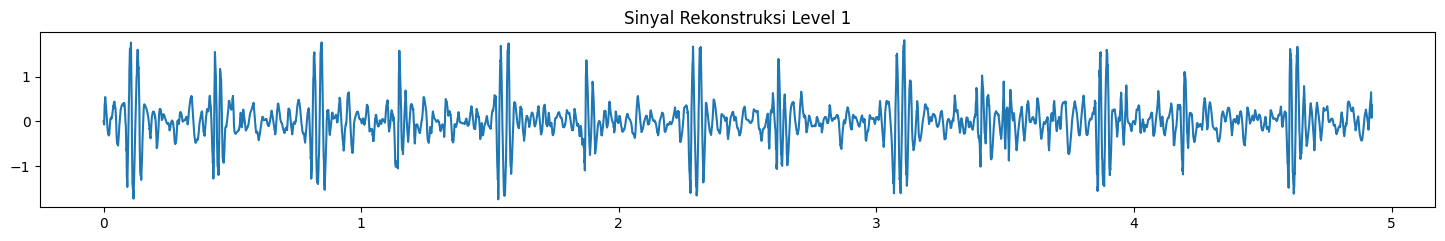

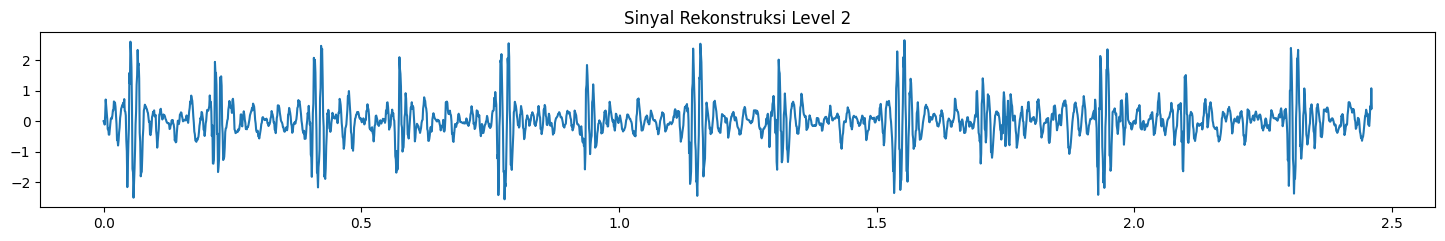

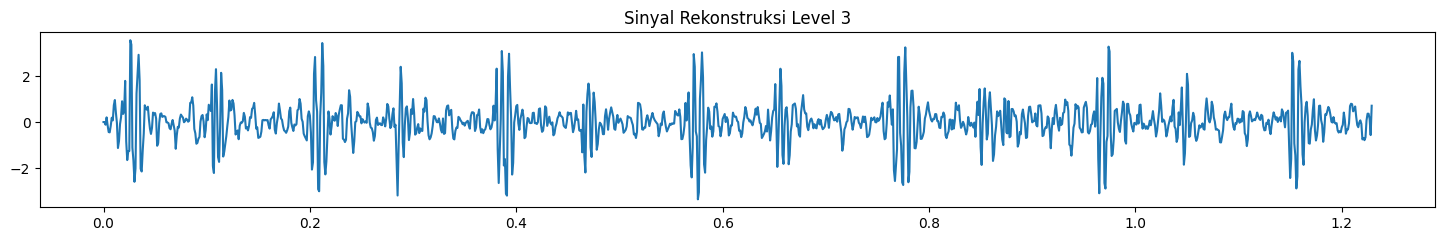

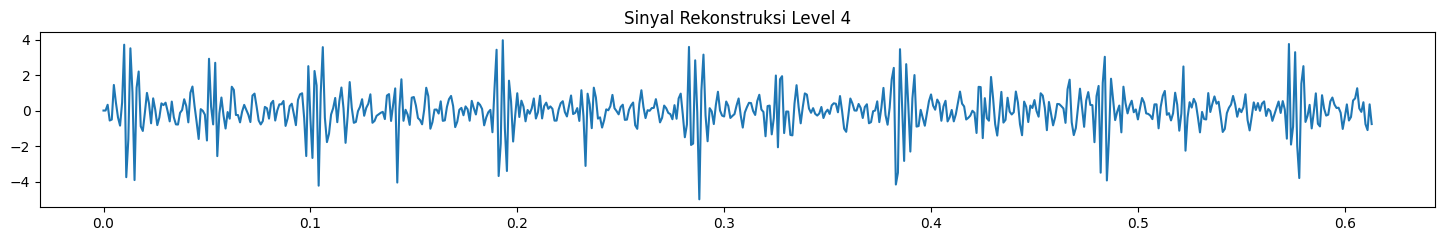

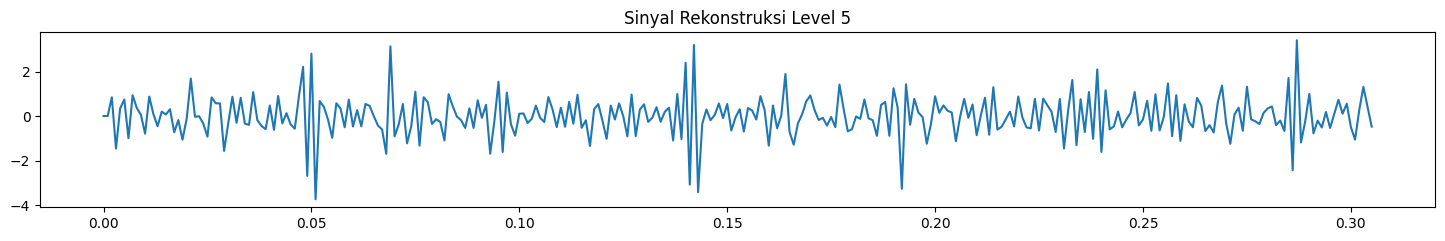

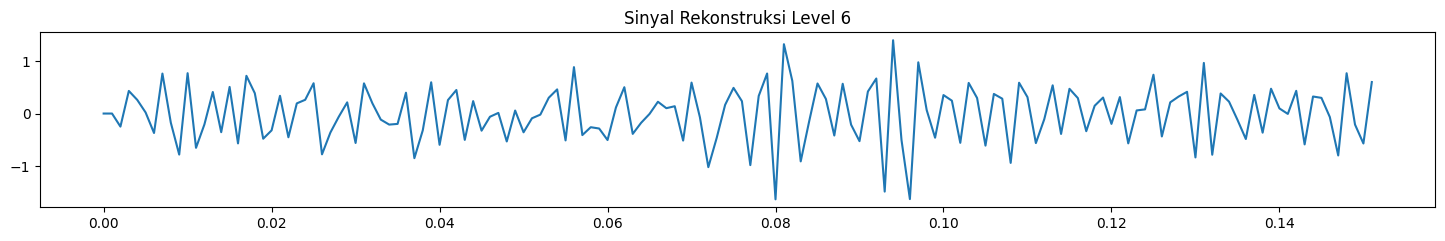

a1_rekon: 4924
a4_rekon: 614


In [1161]:
# Plot the signal
plt.figure(figsize=(18, 5))
plt.subplot(211)
plt.plot(time_pcg, pcg2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal Asli')
plt.show()

plotRekon(a1_rekonstruksi, 1)
plotRekon(a2_rekonstruksi, 2)
plotRekon(a3_rekonstruksi, 3)
plotRekon(a4_rekonstruksi, 4)
plotRekon(a5_rekonstruksi, 5)
plotRekon(a6_rekonstruksi, 6)

print("a1_rekon:" ,len(a1_rekonstruksi))
print("a4_rekon:", len(a4_rekonstruksi))

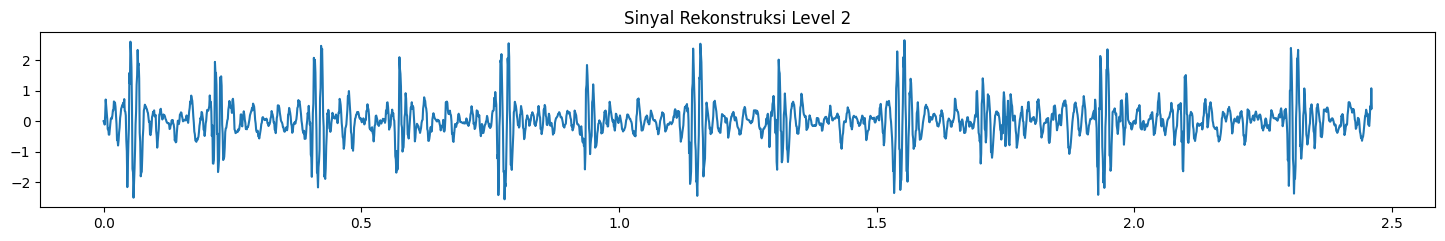

In [1162]:
a2_rekonstruksi = a2_rekonstruksi - np.mean(a2_rekonstruksi)
plotRekon(a2_rekonstruksi, 2)

In [1163]:
len(a2_rekonstruksi)

2462

In [1164]:
def abs(sinyal):
    return np.abs(sinyal)

d4_abs = abs(d4)
d2_abs = abs(d2)
a4_abs = abs(a4)

d1_abs = abs(d1)
a1_abs = abs(a1)

rekon4_abs = abs(a4_rekonstruksi)
rekon2_abs = abs(a2_rekonstruksi)

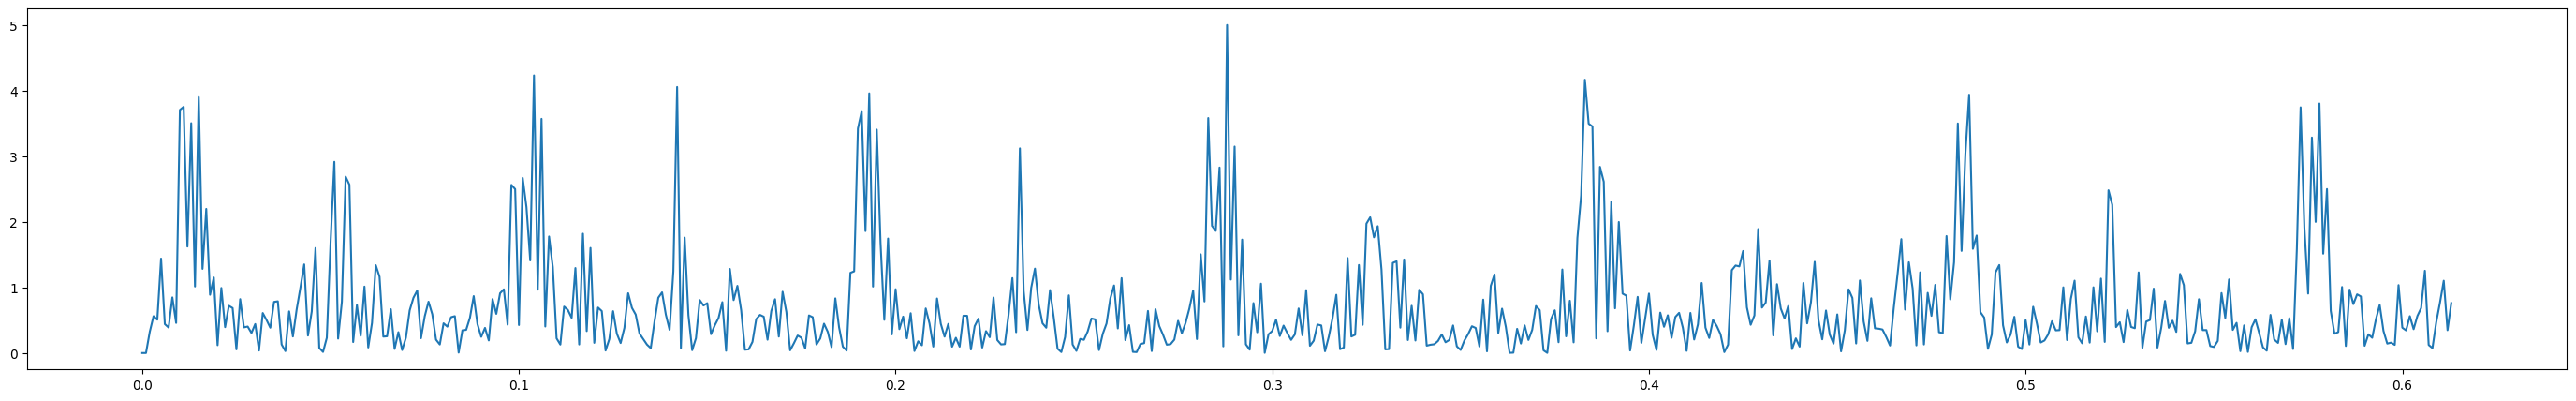

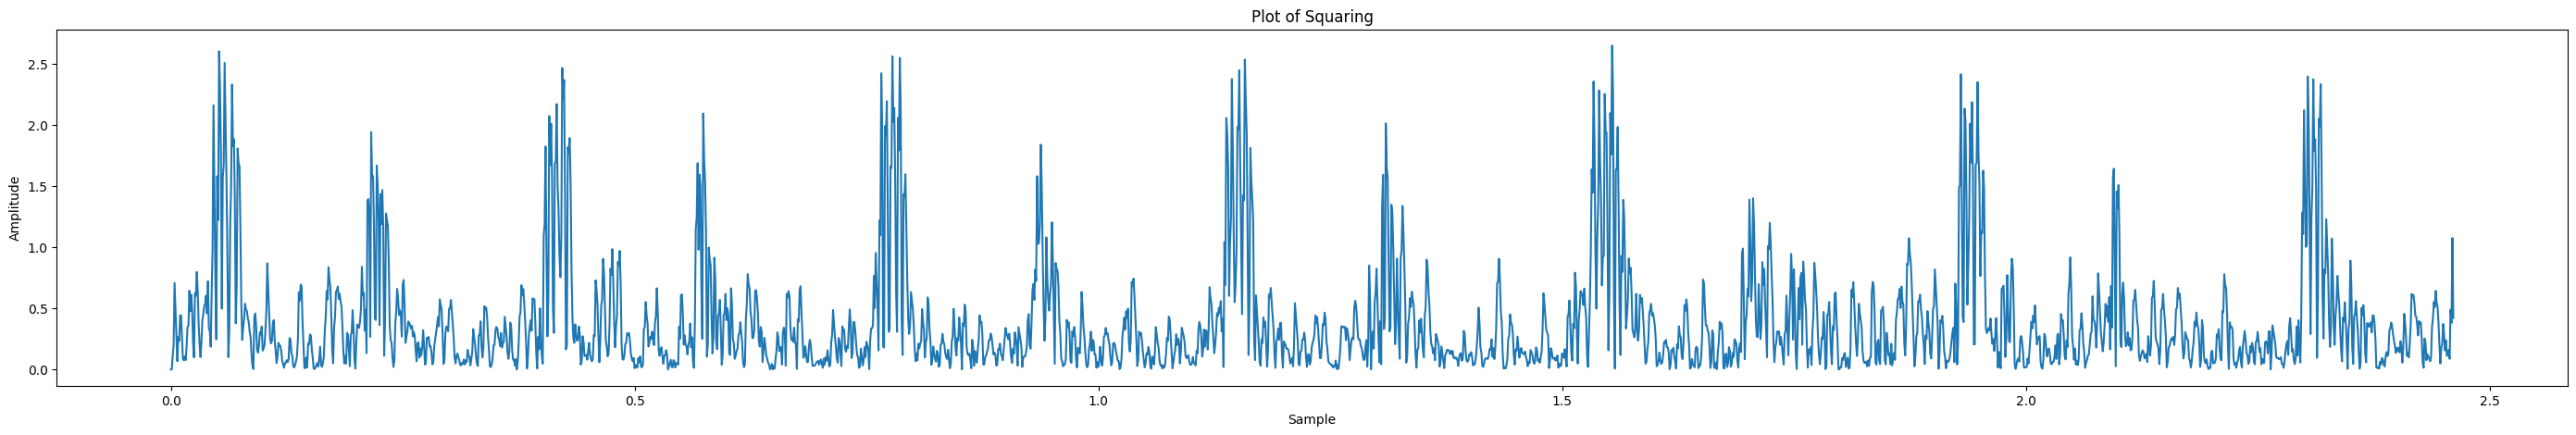

In [1165]:

time_abs4 = np.arange(len(rekon4_abs)) / fs2
time_abs2 = np.arange(len(rekon2_abs)) / fs2

plt.figure(figsize=(35, 5))
plt.plot(time_abs4, rekon4_abs)

plt.figure(figsize=(35, 5))
plt.plot(time_abs2, rekon2_abs)

plt.title("Plot of Squaring")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

In [1166]:
len(rekon4_abs)

614

In [1167]:
#MAV
def MAV(sinyal, orde):
    n = len(sinyal)
    mav = [0] * n
    mav2 = [0] * n
    for k in range(n):
        mav1 = 0
        for m in range(orde):
            y1 = k - m
            if y1 < 0:
                mav1 += sinyal[0]
            else:
                # forward
                mav1 += sinyal[k - m]
        mav2[k] = mav1 / orde
        # backward
        mav3 = 0
        for m in range(orde):
            if k + m < n:
                mav3 += mav2[k + m]
        mav[k] = mav3 / orde
    return mav

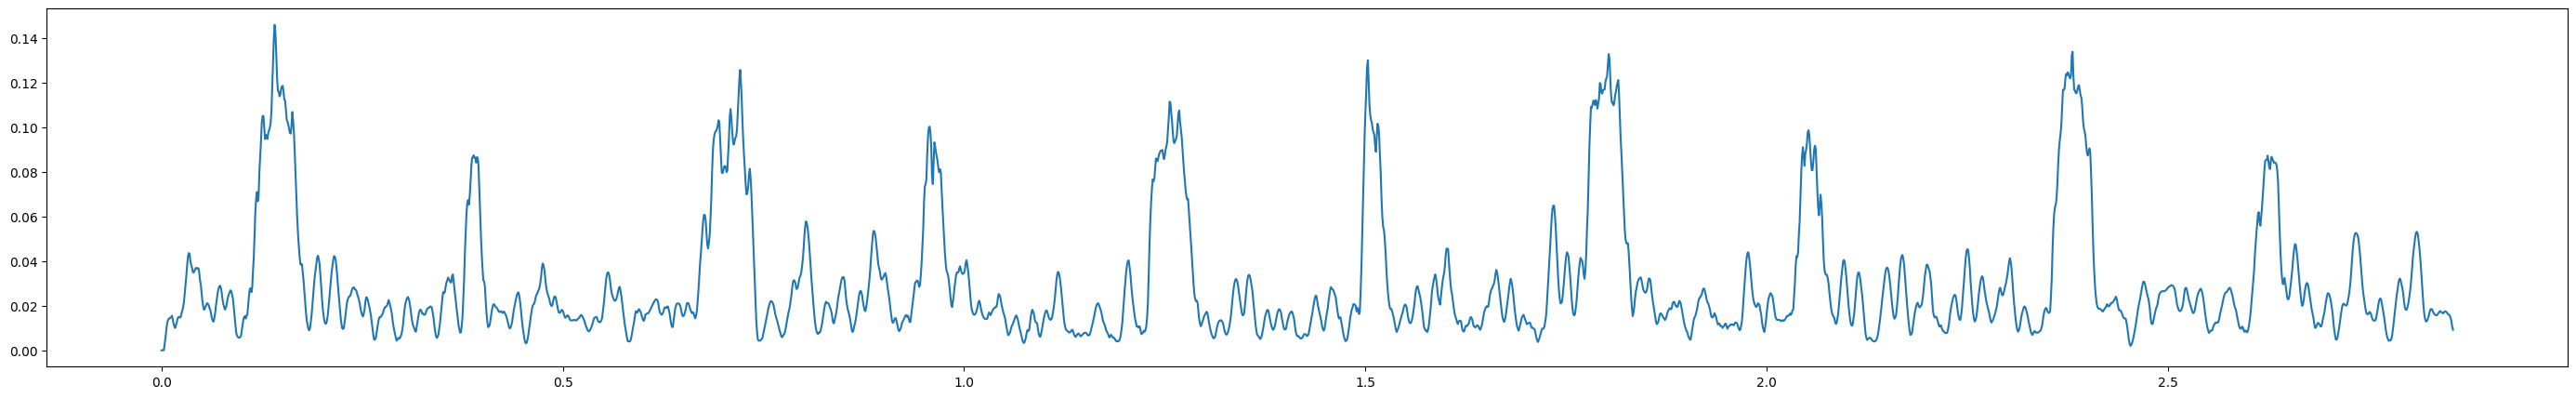

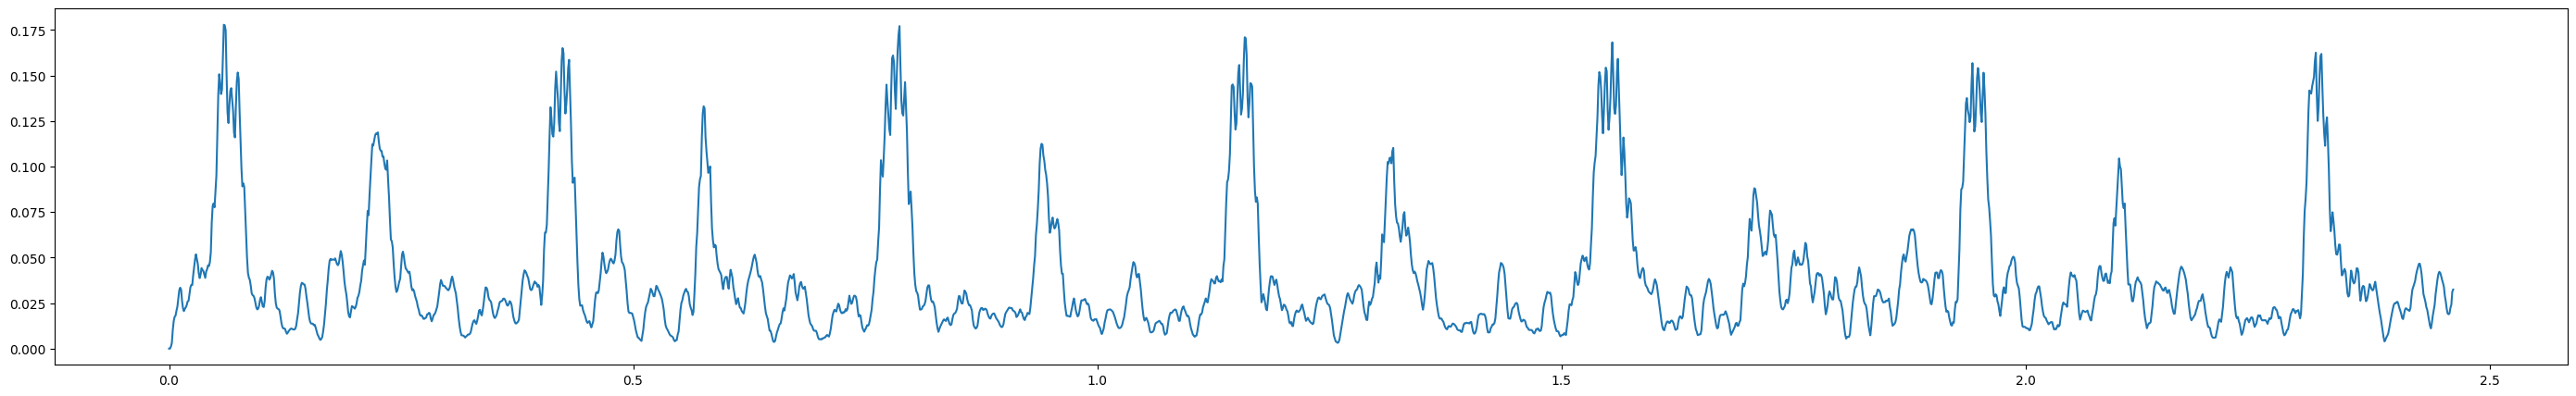

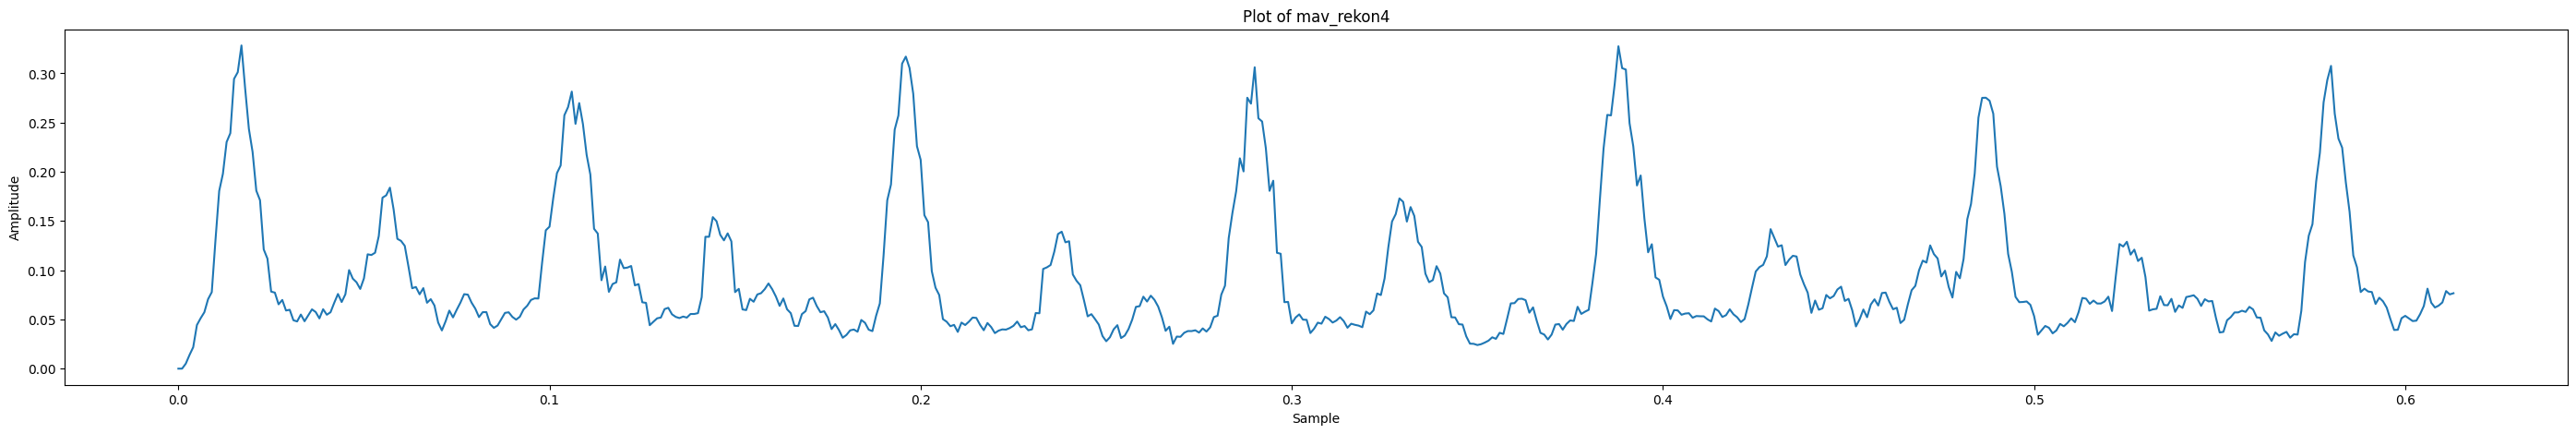

In [1168]:
mav_d4=MAV(d4_abs, 5)
mav_a4=MAV(a4_abs, 2)
mav_rekon4=MAV(rekon4_abs, 8)
mav_rekon1=MAV(rekon1_abs, 10)
mav_rekon2=MAV(rekon2_abs, 10)
time_mav4 = np.arange(len(mav_rekon4)) / fs2
time_mav = np.arange(len(mav_rekon1)) / fs2
time_mav2 = np.arange(len(mav_rekon2)) / fs2
plt.figure(figsize=(35, 5))
plt.plot(time_mav, mav_rekon1)
plt.figure(figsize=(35, 5))
plt.plot(time_mav2, mav_rekon2)
plt.figure(figsize=(35, 5))
plt.plot(time_mav4, mav_rekon4)
plt.title("Plot of mav_rekon4")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

In [1169]:
len(mav_rekon4)

614

In [1170]:
def max(sinyal):
    S = 0
    for i in range(len(sinyal)):
        if S < sinyal[i]:
            S = sinyal[i]
    return S

def normalize_mav(mav):
    max_mav = max(mav)
    normmav = [0] * len(mav)
    for i in range(len(mav)):
        normmav[i] = mav[i] / max_mav
    return normmav

In [1171]:
normalize_mavd4 = normalize_mav(mav_d4)
normalize_mava4 = normalize_mav(mav_a4)
normalize_rekon4 = normalize_mav(mav_rekon4)
normalize_rekon2 = normalize_mav(mav_rekon2)
normalize_a4rekon = normalize_mav(a4_rekonstruksi)
normalize_a2rekon = normalize_mav(a2_rekonstruksi)

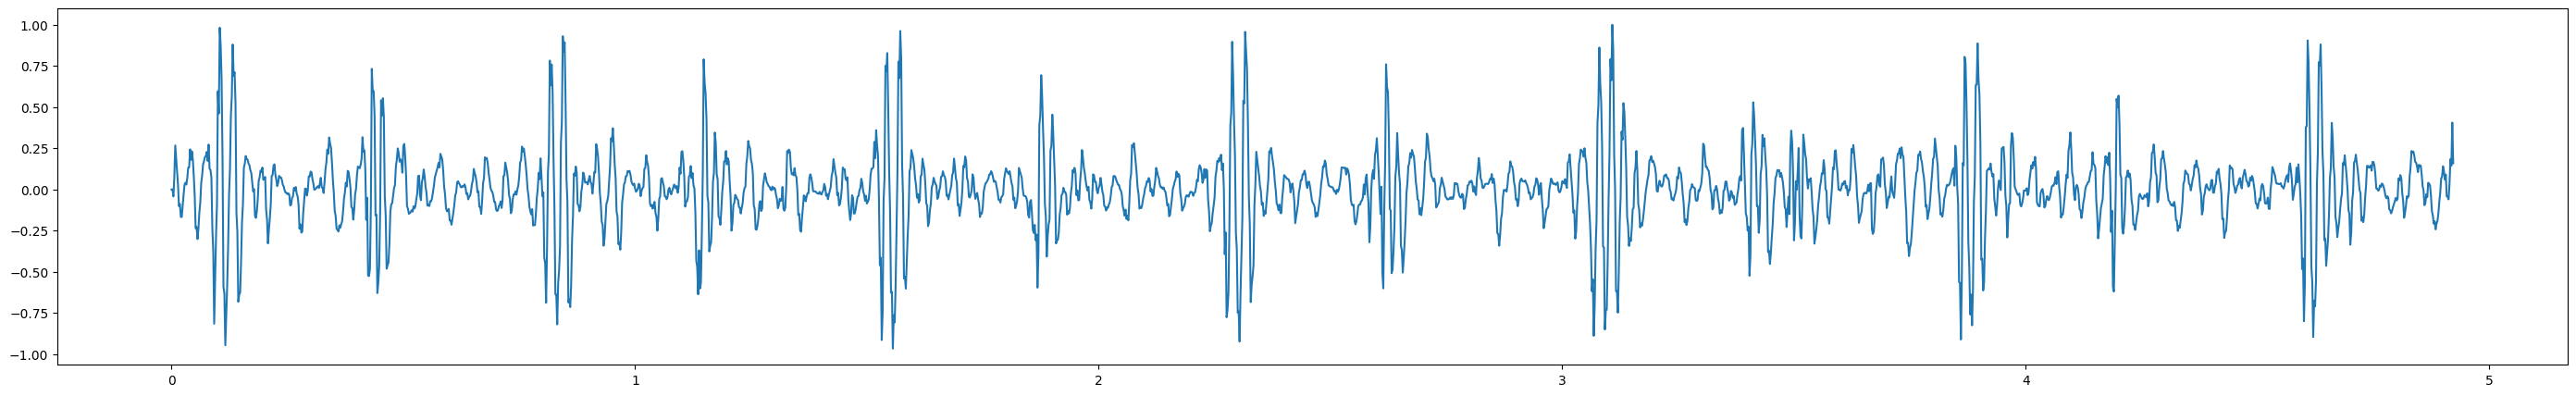

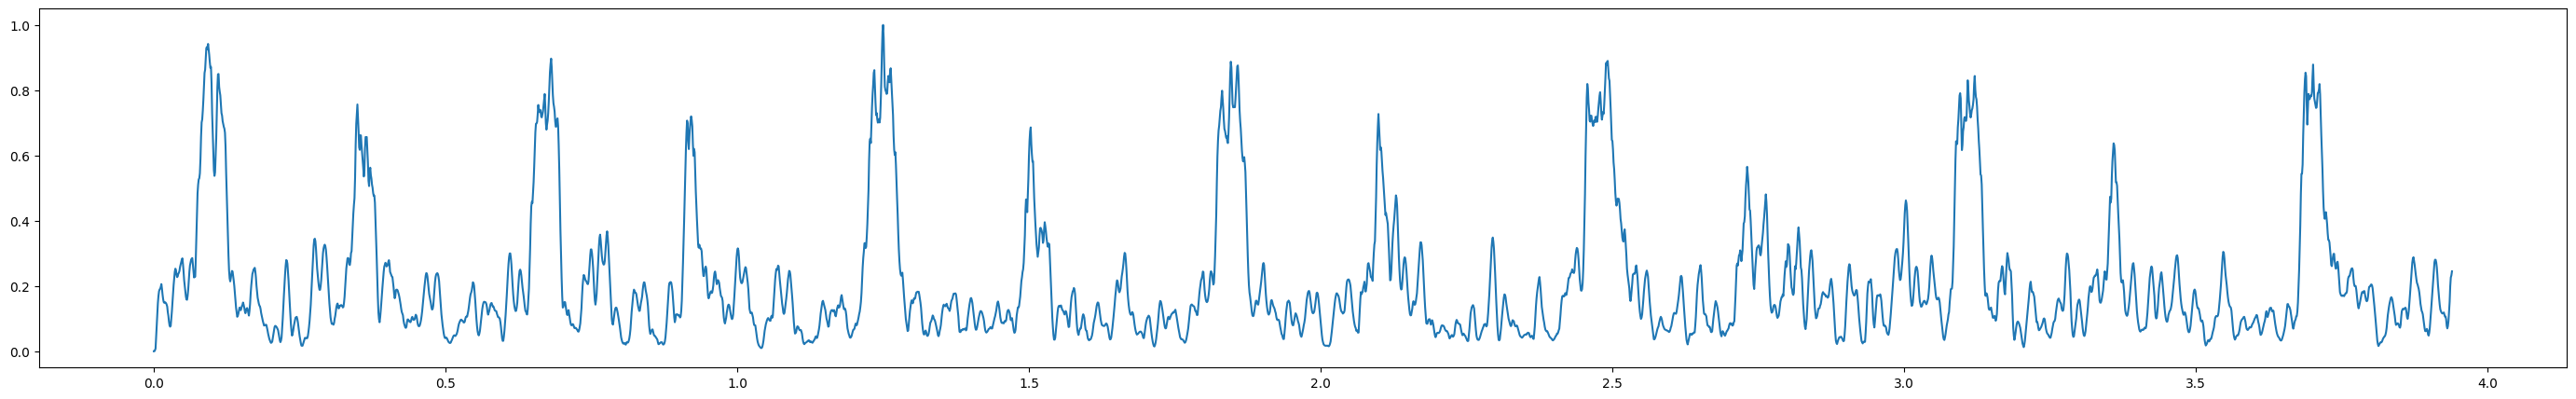

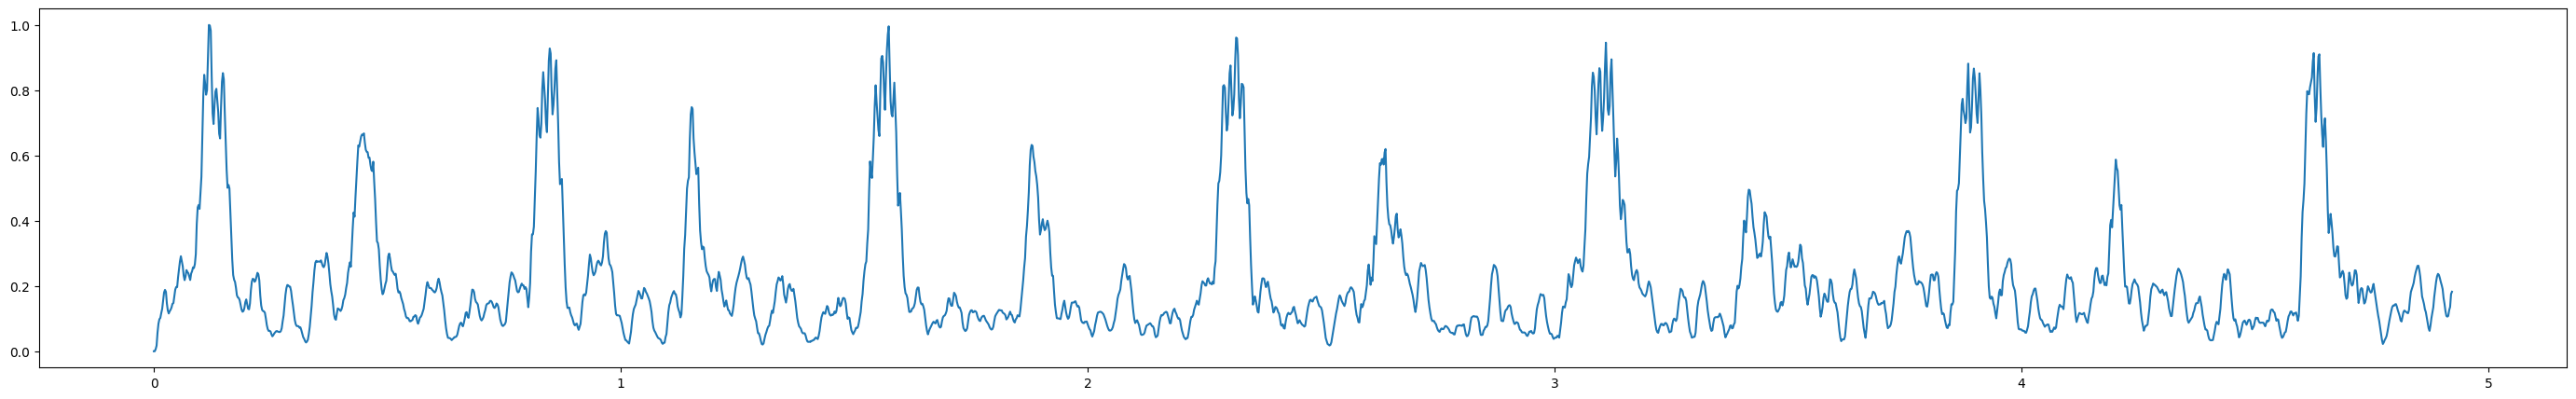

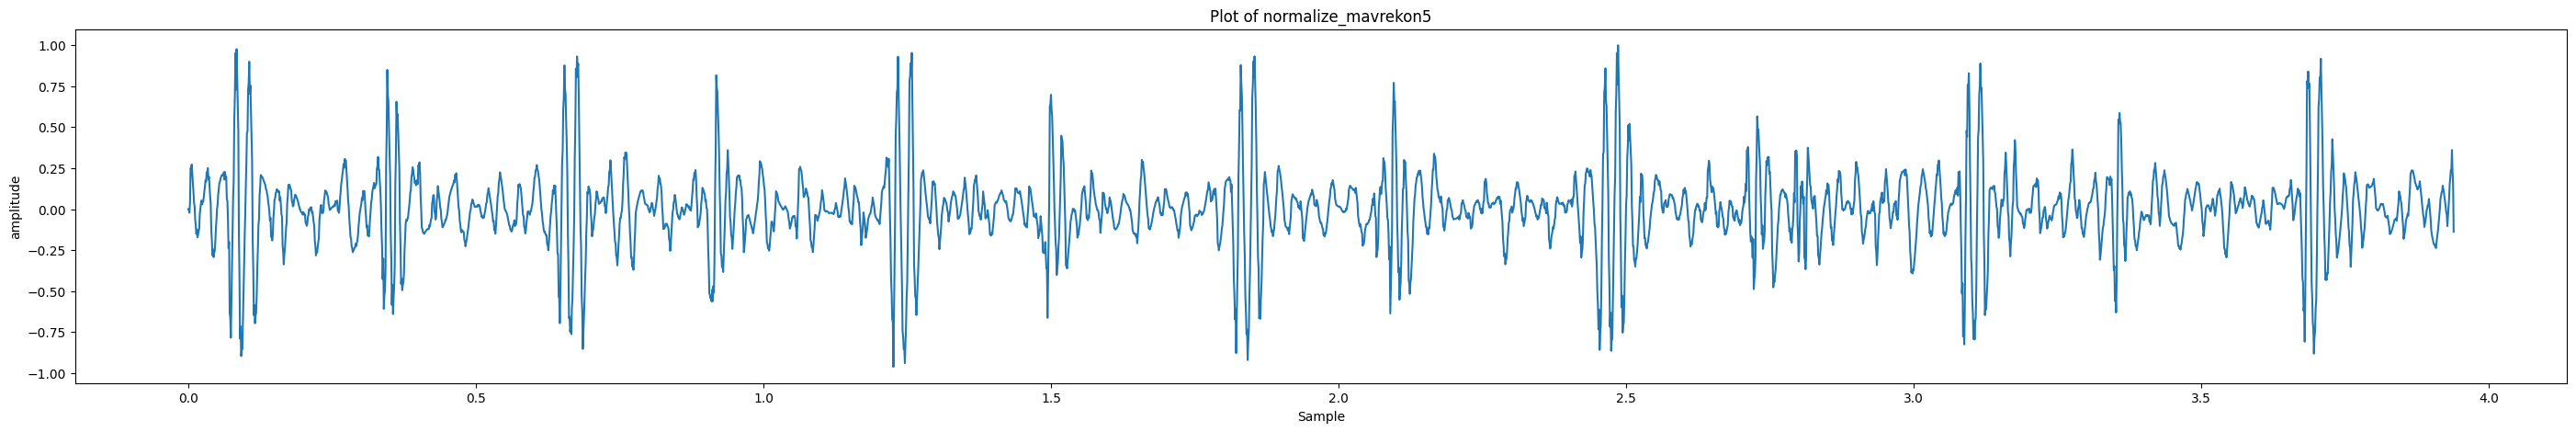

1000
3940


In [1172]:
time_normalize = np.arange(len(normalize_rekon1)) / fs2
time_normalize2 = np.arange(len(normalize_rekon2)) / 500
time_normalizea2 = np.arange(len(normalize_a2rekon)) / 500
time_normalizea1 = np.arange(len(normalize_a1rekon)) / fs2

plt.figure(figsize=(35, 5))
plt.plot(time_normalizea2,normalize_a2rekon)
plt.figure(figsize=(35, 5))
plt.plot(time_normalize,normalize_rekon1)
plt.figure(figsize=(35, 5))
plt.plot(time_normalize2,normalize_rekon2)
plt.figure(figsize=(35, 5))
plt.plot(time_normalizea1,normalize_a1rekon)
plt.title("Plot of normalize_mavrekon5")
plt.xlabel("Sample")
plt.ylabel("amplitude")
plt.show()
print(fs2)
print(len(normalize_rekon1))

In [1173]:
print(len(normalize_rekon4))
print(len(pcg))
print(len(normalize_rekon1)/len(normalize_rekon4))

614
18800
6.416938110749186


tps2_values [17, 53, 90, 128, 168, 206, 243]


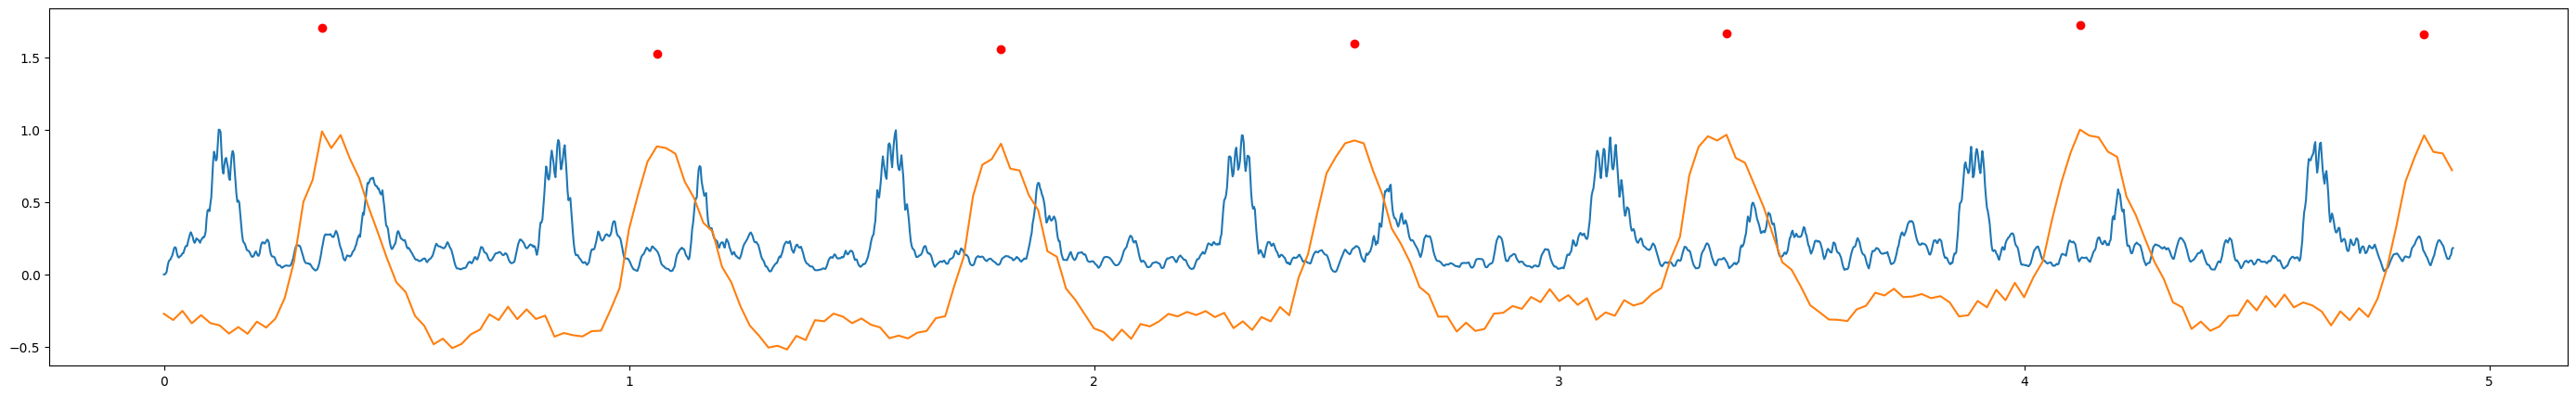

In [1174]:
plt.figure(figsize=(35, 5))
plt.plot(time_normalize2, normalize_rekon2)

signalppg2_normalized = ppg2 / np.max(np.abs(ppg2))
plt.plot(time_ppg, signalppg2_normalized, label='PPG REGRESI')
plt.plot(np.array(filtered_tp_final2)/fs, tps2_values, 'ro', label='Titik Puncak')
print("tps2_values", filtered_tp_final2)

# sinkronisasi peak

7
[0.14 0.86 1.6  2.36 3.16 3.92 4.66]
500


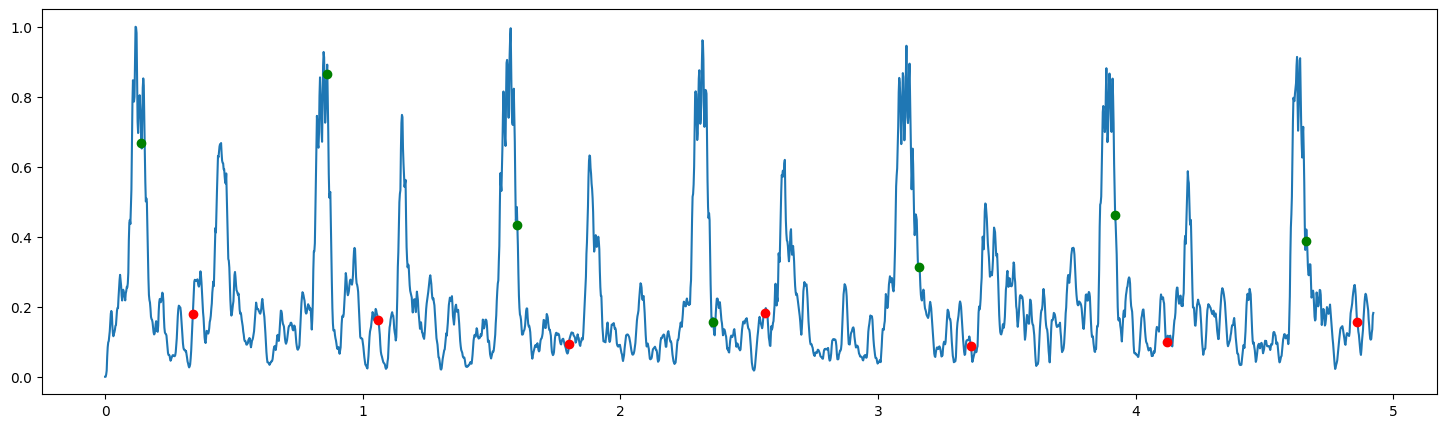

In [1175]:

perbfs = len(normalize_rekon4)/len(ppg3)
fs3 = 500
filtered_tp_final2 = np.array(filtered_tp_final2)

filtered_tp_final1 = filtered_tp_final2 - 10

tp1=np.array(filtered_tp_final1)/fs
tp2=np.array(filtered_tp_final2)/fs

s1 = [int(u * fs3) for u in tp1]
s2 = [int(d * fs3) for d in tp2]

t2 = np.arange(len(normalize_rekon2)) /fs3
ts1 = np.array(s1) / fs3
ts2 = np.array(s2) / fs3

print(len(ts1))
print(ts1)
print(fs3)

# plot original signal PCG
plt.figure(figsize=(18, 5))
plt.plot(t2, normalize_rekon2, label='Sinyal PCG MAV')

# Plot s1 s2
plt.plot(ts1, [normalize_rekon2[int(i)] for i in s1], 'go', label='Upward Slope Zerocrossing')
plt.plot(ts2, [normalize_rekon2[int(i)] for i in s2], 'ro', label='Downward Slope Zerocrossing')


[59, 424, 787, 1159, 1555, 1943, 2313]
[225, 576, 940, 1319, 1708, 2101, 2425]


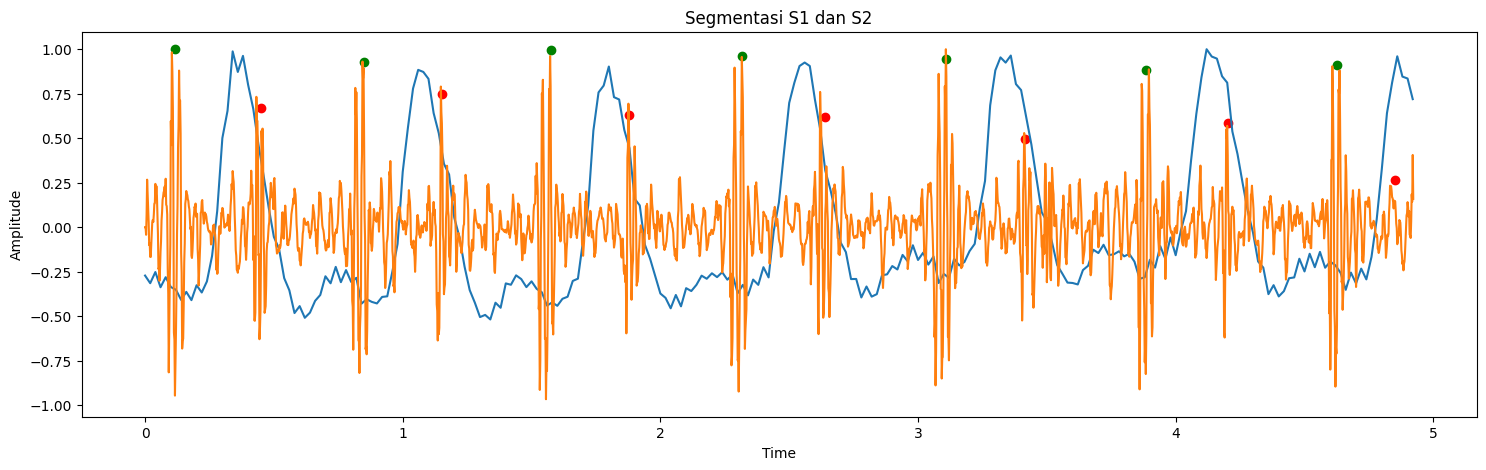

In [1200]:
window_size = int(fs3 * 0.15)  # windowing to find peak in seconds

max_points_s1 = []
for idx in s1:
    start_idx = np.max([0,idx - window_size])
    end_idx = min(len(normalize_rekon2), idx + window_size)
    max_idx = np.argmax(normalize_rekon2[start_idx:end_idx]) + start_idx
    max_points_s1.append(max_idx)

max_points_s2 = []
for idx in s2:
    start_idx = np.max([0,idx - window_size])
    end_idx = min(len(normalize_rekon2), idx + window_size)
    max_idx = np.argmax(normalize_rekon2[start_idx:end_idx]) + start_idx
    max_points_s2.append(max_idx)

# Plot original signal pcg
plt.figure(figsize=(18, 5))

tsnew1 = np.array(max_points_s1) / fs3
tsnew2 = np.array(max_points_s2) / fs3

# Plot peak around s1 s2
plt.plot(tsnew1, [normalize_rekon2[int(i)] for i in max_points_s1], 'go', label='Max Around Upward')
plt.plot(tsnew2, [normalize_rekon2[int(i)] for i in max_points_s2], 'ro', label='Max Around Downward')

plt.plot(time_ppg, signalppg2_normalized, label='PPG ')
plt.plot(time_normalizea2,normalize_a2rekon)
plt.title("Segmentasi S1 dan S2")
plt.xlabel("Time")
plt.ylabel("Amplitude")
print(max_points_s1)
print(max_points_s2)

In [1177]:
'''finish'''

'kkk'